# Problem Statement
Cardiovascular diseases (CVDs) remain one of the leading causes of death worldwide. Early prediction and diagnosis of heart disease can significantly improve patient outcomes and reduce healthcare costs. Traditionally, heart disease prediction has relied on basic statistical methods and simpler machine learning algorithms. However, the increasing complexity of patient data and the need for more accurate predictions have led to the adoption of advanced machine learning techniques. This case study explores the application of ensemble learning and deep learning methods to enhance the prediction of heart disease using the dataset provided.
![](https://img.freepik.com/free-vector/cardiologists-examining-heart-with-stethoscope-blood-samples-lab-tubes-among-pills-heartbeat-diagram-vector-illustration-cardiology-medical-examination-heart-disease-concept_74855-9817.jpg)

# Import Libraries for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Setting the matplotlib parameters
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 12, 8

# Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

# 1.0 Loading Dataset and EDA

## 1.1 Heart Dataset Overview
The dataset contains 303 entries and 14 columns, all of which have non-null values. The columns represent various features related to heart health, such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol level (chol), fasting blood sugar (fbs), and more. The target variable (target) indicates the presence (1) or absence (0) of heart disease.

The dataset used for this case study is the "Heart Attack Dataset" from Kaggle. It includes the following features:
- `Age`: Age of the patient
- `Sex`: Gender of the patient (1 = male, 0 = female)
- `cp`: Chest pain type (4 types)
- `trestbps`: Resting blood pressure (mmHg)
- `chol`: Serum cholesterol level (mg/dL)
- `fbs`: Fasting blood sugar (1 = true, 0 = false)
- `restecg`: Resting electrocardiographic results (values 0, 1, 2)
- `thalach`: Maximum heart rate achieved
- `exang`: Exercise induced angina (1 = yes, 0 = no)
- `oldpeak`: Depression induced by exercise relative to rest
- `slope`: Slope of the peak exercise ST segment (3 types)
- `ca`: Number of major vessels colored by fluoroscopy (0-3)
- `thal`: Thalassemia (3 types)
- `target`: Presence or absence of heart disease (1 = presence, 0 = absence)


In [2]:
# Read the heart dataset
heart_data = pd.read_csv('heart.csv')

In [3]:
# Check the shape of the dataset
print("Dataset Shape:", heart_data.shape)

Dataset Shape: (303, 14)


In [4]:
# Check the column names
column_names = heart_data.columns
column_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check the data frame info
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Changing the data type of categorical variables to 'object'
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
heart_data[categorical_columns] = heart_data[categorical_columns].astype('object')

# Descriptive statistics after changing the dtype of categorical data
heart_data_description = heart_data.describe(include='all')
heart_data_description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.0,303.0,303.000000,303.000000,303.0,303.0,303.000000,303.0,303.000000,303.0,303.0,303.0,303.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,5.0,4.0,2.0
top,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,2.0,0.0,2.0,1.0
freq,NaN,207.0,143.0,NaN,NaN,258.0,152.0,NaN,204.0,NaN,142.0,175.0,166.0,165.0
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,NaN,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,NaN


In [7]:
def print_unique_col_values(df):
    """
    Print unique values and their counts for each column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    """
    for column in df:
        print(f"{column} : {df[column].unique()} ({len(df[column].unique())} unique values)")
        print("--------------------------------------------------------------")

In [8]:
# Print unique values and their counts for each column in df
print_unique_col_values(heart_data)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] (41 unique values)
--------------------------------------------------------------
sex : [1 0] (2 unique values)
--------------------------------------------------------------
cp : [3 2 1 0] (4 unique values)
--------------------------------------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] (49 unique values)
--------------------------------------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 

<font color='blue'><b>Observation for Summary Statistics:</b></font>

The descriptive statistics for the heart disease dataset provide insights into the distribution and range of the features:
- `Age`: The average age of patients is approximately 54.4 years, with a minimum of 29 years and a maximum of 77 years.
- `Sex`: There are 2 unique values: 1 (male) and 0 (female). The dataset is skewed towards males, with approximately 68.3% male patients. (207 out of 303).
- `Chest Pain Type (cp)`: This categorical variable has values ranging from 0 to 3, indicating different types of chest pain experienced by the patients. Type 0 is the most common (143 instances).
- `Resting Blood Pressure (trestbps)`: The average resting blood pressure is around 131.6 mmHg, with a range between 94 and 200 mmHg.
- `Cholesterol Level (chol)`: The average serum cholesterol level is about 246.3 mg/dL, with a minimum of 126 mg/dL and a maximum of 564 mg/dL.
- `Fasting Blood Sugar (fbs)`: This binary variable indicates whether fasting blood sugar is greater than 120 mg/dL (1 = true, 0 = false), with 0 (fasting blood sugar ≤ 120 mg/dL) being the most frequent.
- `Resting ECG (restecg)`: This feature represents the resting electrocardiographic results, with values ranging from 0 to 2. Class 1 (having ST-T wave abnormality) being the most frequent.
- `Maximum Heart Rate Achieved (thalach)`: The average maximum heart rate is about 149.6 beats per minute, with a range from 71 to 202.
- `Exercise Induced Angina (exang)`: This binary feature indicates whether exercise induced angina is present (1 = yes, 0 = no). Class 0 is the most frequent.
- `Oldpeak`: This feature represents the ST depression induced by exercise relative to rest, with values ranging from 0 to 6.2.
- `Slope`: This categorical feature describes the slope of the peak exercise ST segment. The slope type 2 (flat) being the most frequent.
- `Number of Major Vessels Colored by Fluoroscopy (ca)`: The variable ranges from 0 to 4. The '0' vessel being the most frequent.
- `Thalassemia (thal)`: A categorical feature with values 0, 1, 2, and 3, representing different levels or types of thalassemia.Value 2 (fixed defect) being the most frequent.
- `Target`: The target variable is binary, with 1 indicating the presence of heart disease and 0 indicating the absence. The target variable is fairly balanced, with 165 instances of heart disease (1) and 138 without (0).

In [9]:
# Checking for any missing value in the dataset
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
# Check for duplicated rows
heart_data.duplicated().sum()

1

<font color='blue'><b>Observation for Missing Values and Duplicates: </b></font> There is no missing values and only 1 duplicate observed.

In [11]:
def count_outliers(df, threshold=1.5):
    """
    Count outliers in a DataFrame using the IQR method.

    Parameters:
    - df: DataFrame
    - threshold: float, optional, default: 1.5
      The threshold for defining outliers. Adjust as needed.

    Returns:
    - outlier_counts: Series
      Series containing the count of outliers for each column.
    """

    # Filter the DataFrame to include only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    outlier_counts = pd.Series(index=numeric_df.columns, dtype=int)

    # Iterate over each numerical column in the DataFrame
    for column in numeric_df.columns:
        # Calculate the IQR for the column
        q75, q25 = numeric_df[column].quantile([0.75, 0.25])
        iqr = q75 - q25

        # Define the lower and upper bounds for outliers
        lower_bound = q25 - threshold * iqr
        upper_bound = q75 + threshold * iqr

        # Count outliers using the bounds
        num_outliers = ((numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)).sum()

        # Add the count to the Series
        outlier_counts[column] = num_outliers

    return outlier_counts

In [12]:
# Show the outlier_counts
outlier_counts = count_outliers(heart_data)
print("\nNumber of Outliers:")
print(outlier_counts)


Number of Outliers:
age         0.0
trestbps    9.0
chol        5.0
thalach     1.0
oldpeak     5.0
dtype: float64


<font color='blue'><b>Observation from Outlier Counts:</b></font>

The presence of outliers in some columns, such as `'trestbps'` `'chol'`, `'thalach'`, and `'oldpeak'` may require further investigation and potential outlier handling based on the specific characteristics and goals of your analysis.

## 1.2 Exploratory Data Analysis (EDA)

### 1.2.1 Univariate Analysis

<font color='purple'><b>Distribution of Numerical Variables</b></font>

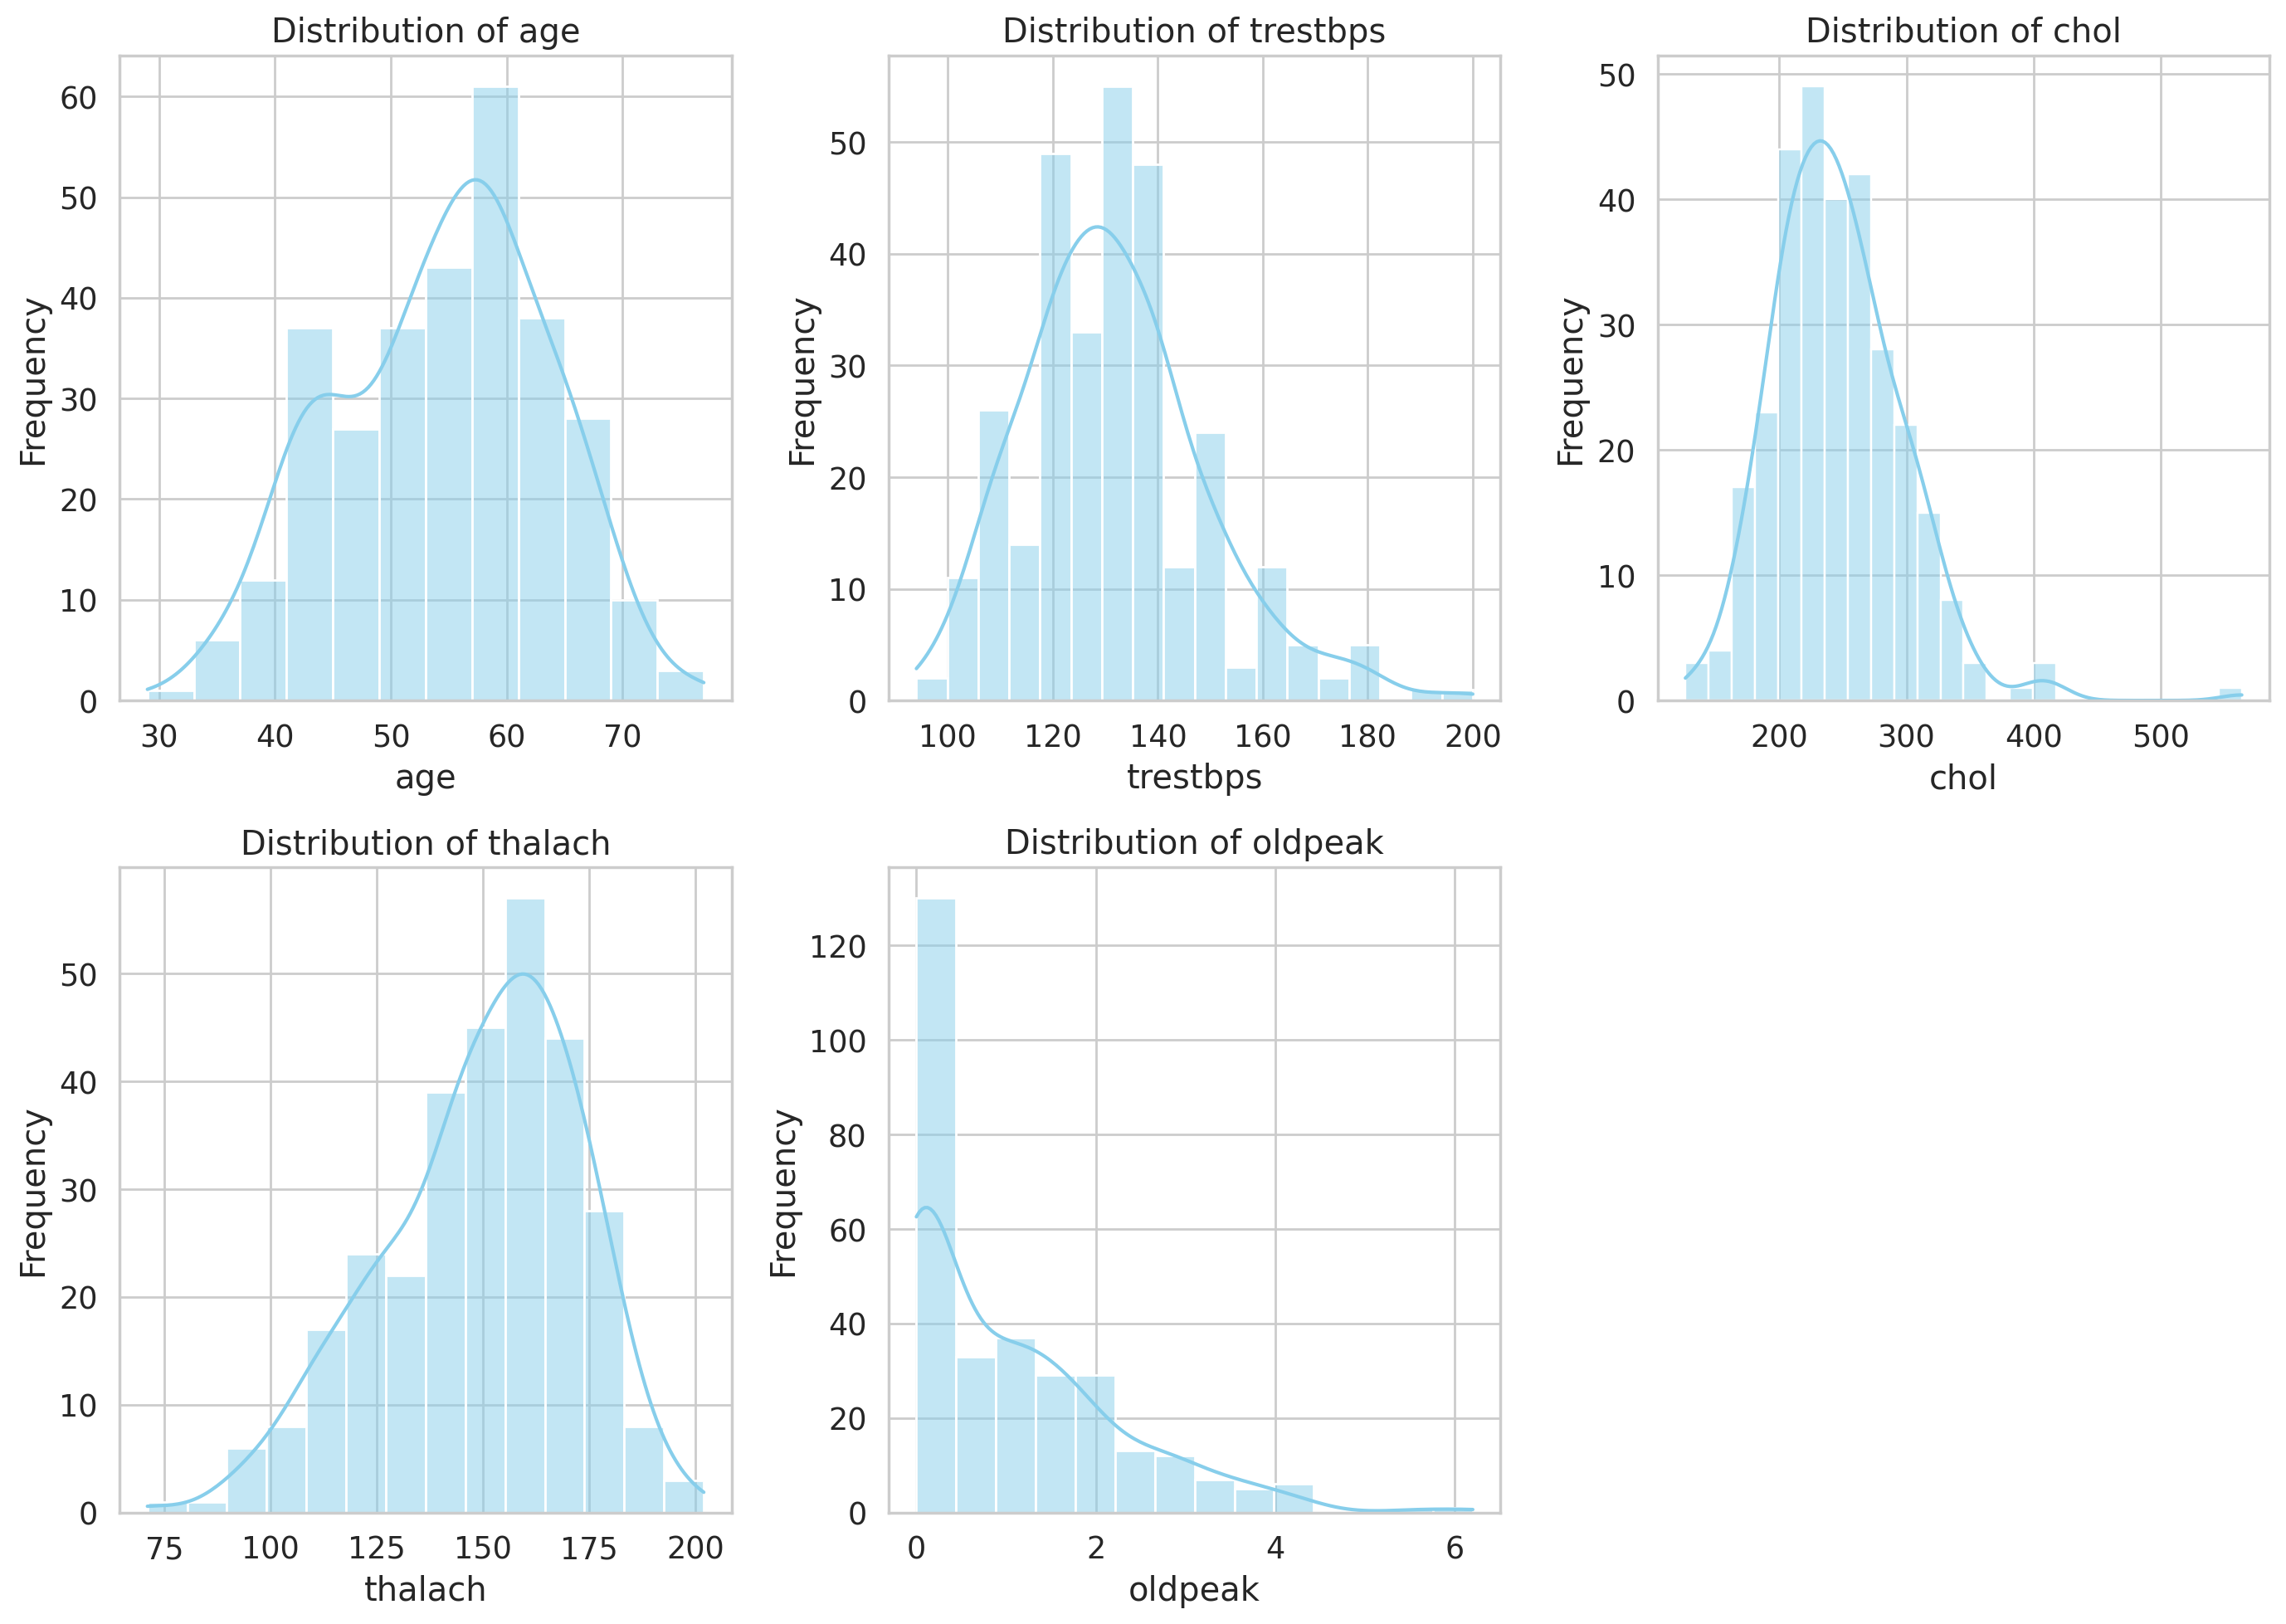

In [13]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=heart_data, x=column, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Optional:** Plotly Express Version [Interactive and Value Check]

In [14]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for column in numerical_columns:
    fig = px.histogram(heart_data, x=column, marginal='violin', color_discrete_sequence=['skyblue'], title=f'Distribution of {column}')
    fig.update_layout(bargap=0.1)
    fig.show()

<font color='purple'><b>Distribution of Categorical Variables</b></font>

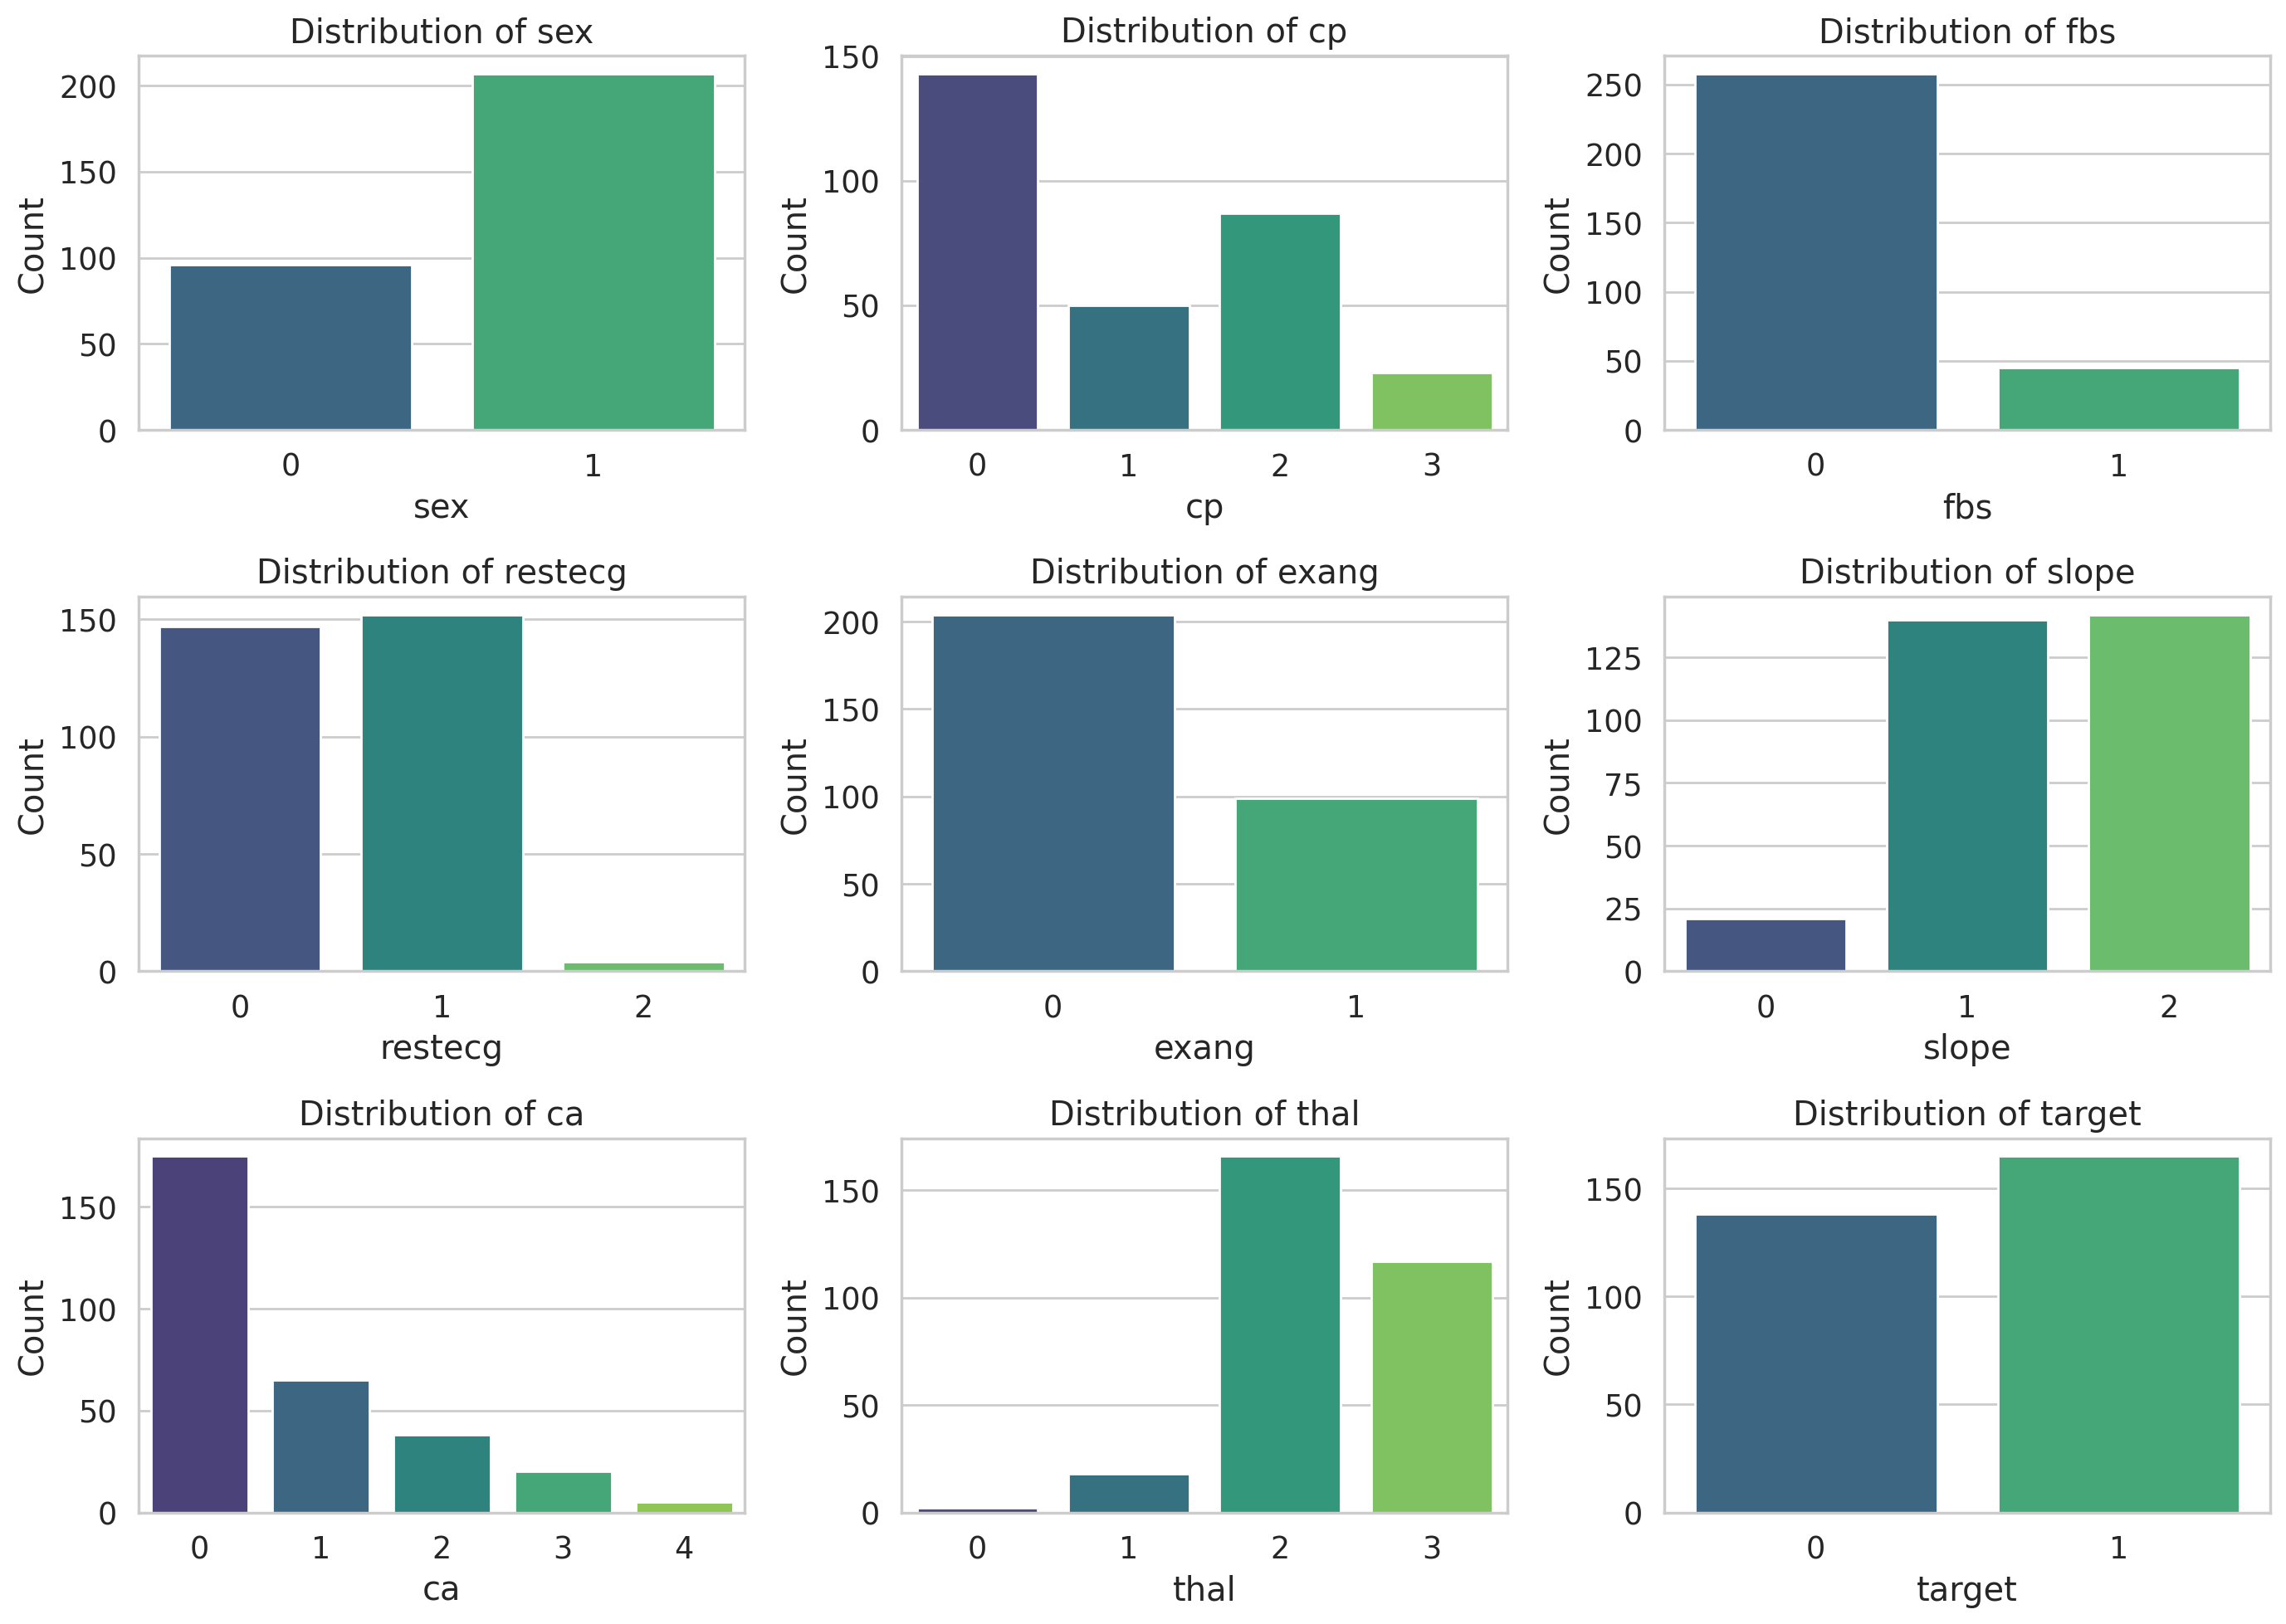

In [15]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=heart_data[categorical_columns], x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Optional:** Plotly Express Version [Interactive and Value Check]

In [16]:
for column in categorical_columns:
    # Prepare data for each categorical column
    category_counts = heart_data[column].value_counts().reset_index()
    category_counts.columns = [column, 'count']  # Renaming columns for clarity

    # Plotting the bar chart with total counts
    fig = px.bar(category_counts, x=column, y='count', color=column,
                 title=f'Distribution of {column}',
                 color_discrete_sequence=px.colors.qualitative.Vivid)
    fig.update_layout(bargap=0.1)
    fig.show()

### 1.2.2 Multivariate Analysis

<font color='purple'><b>Boxplot for Numerical Variables Against Target</b></font>


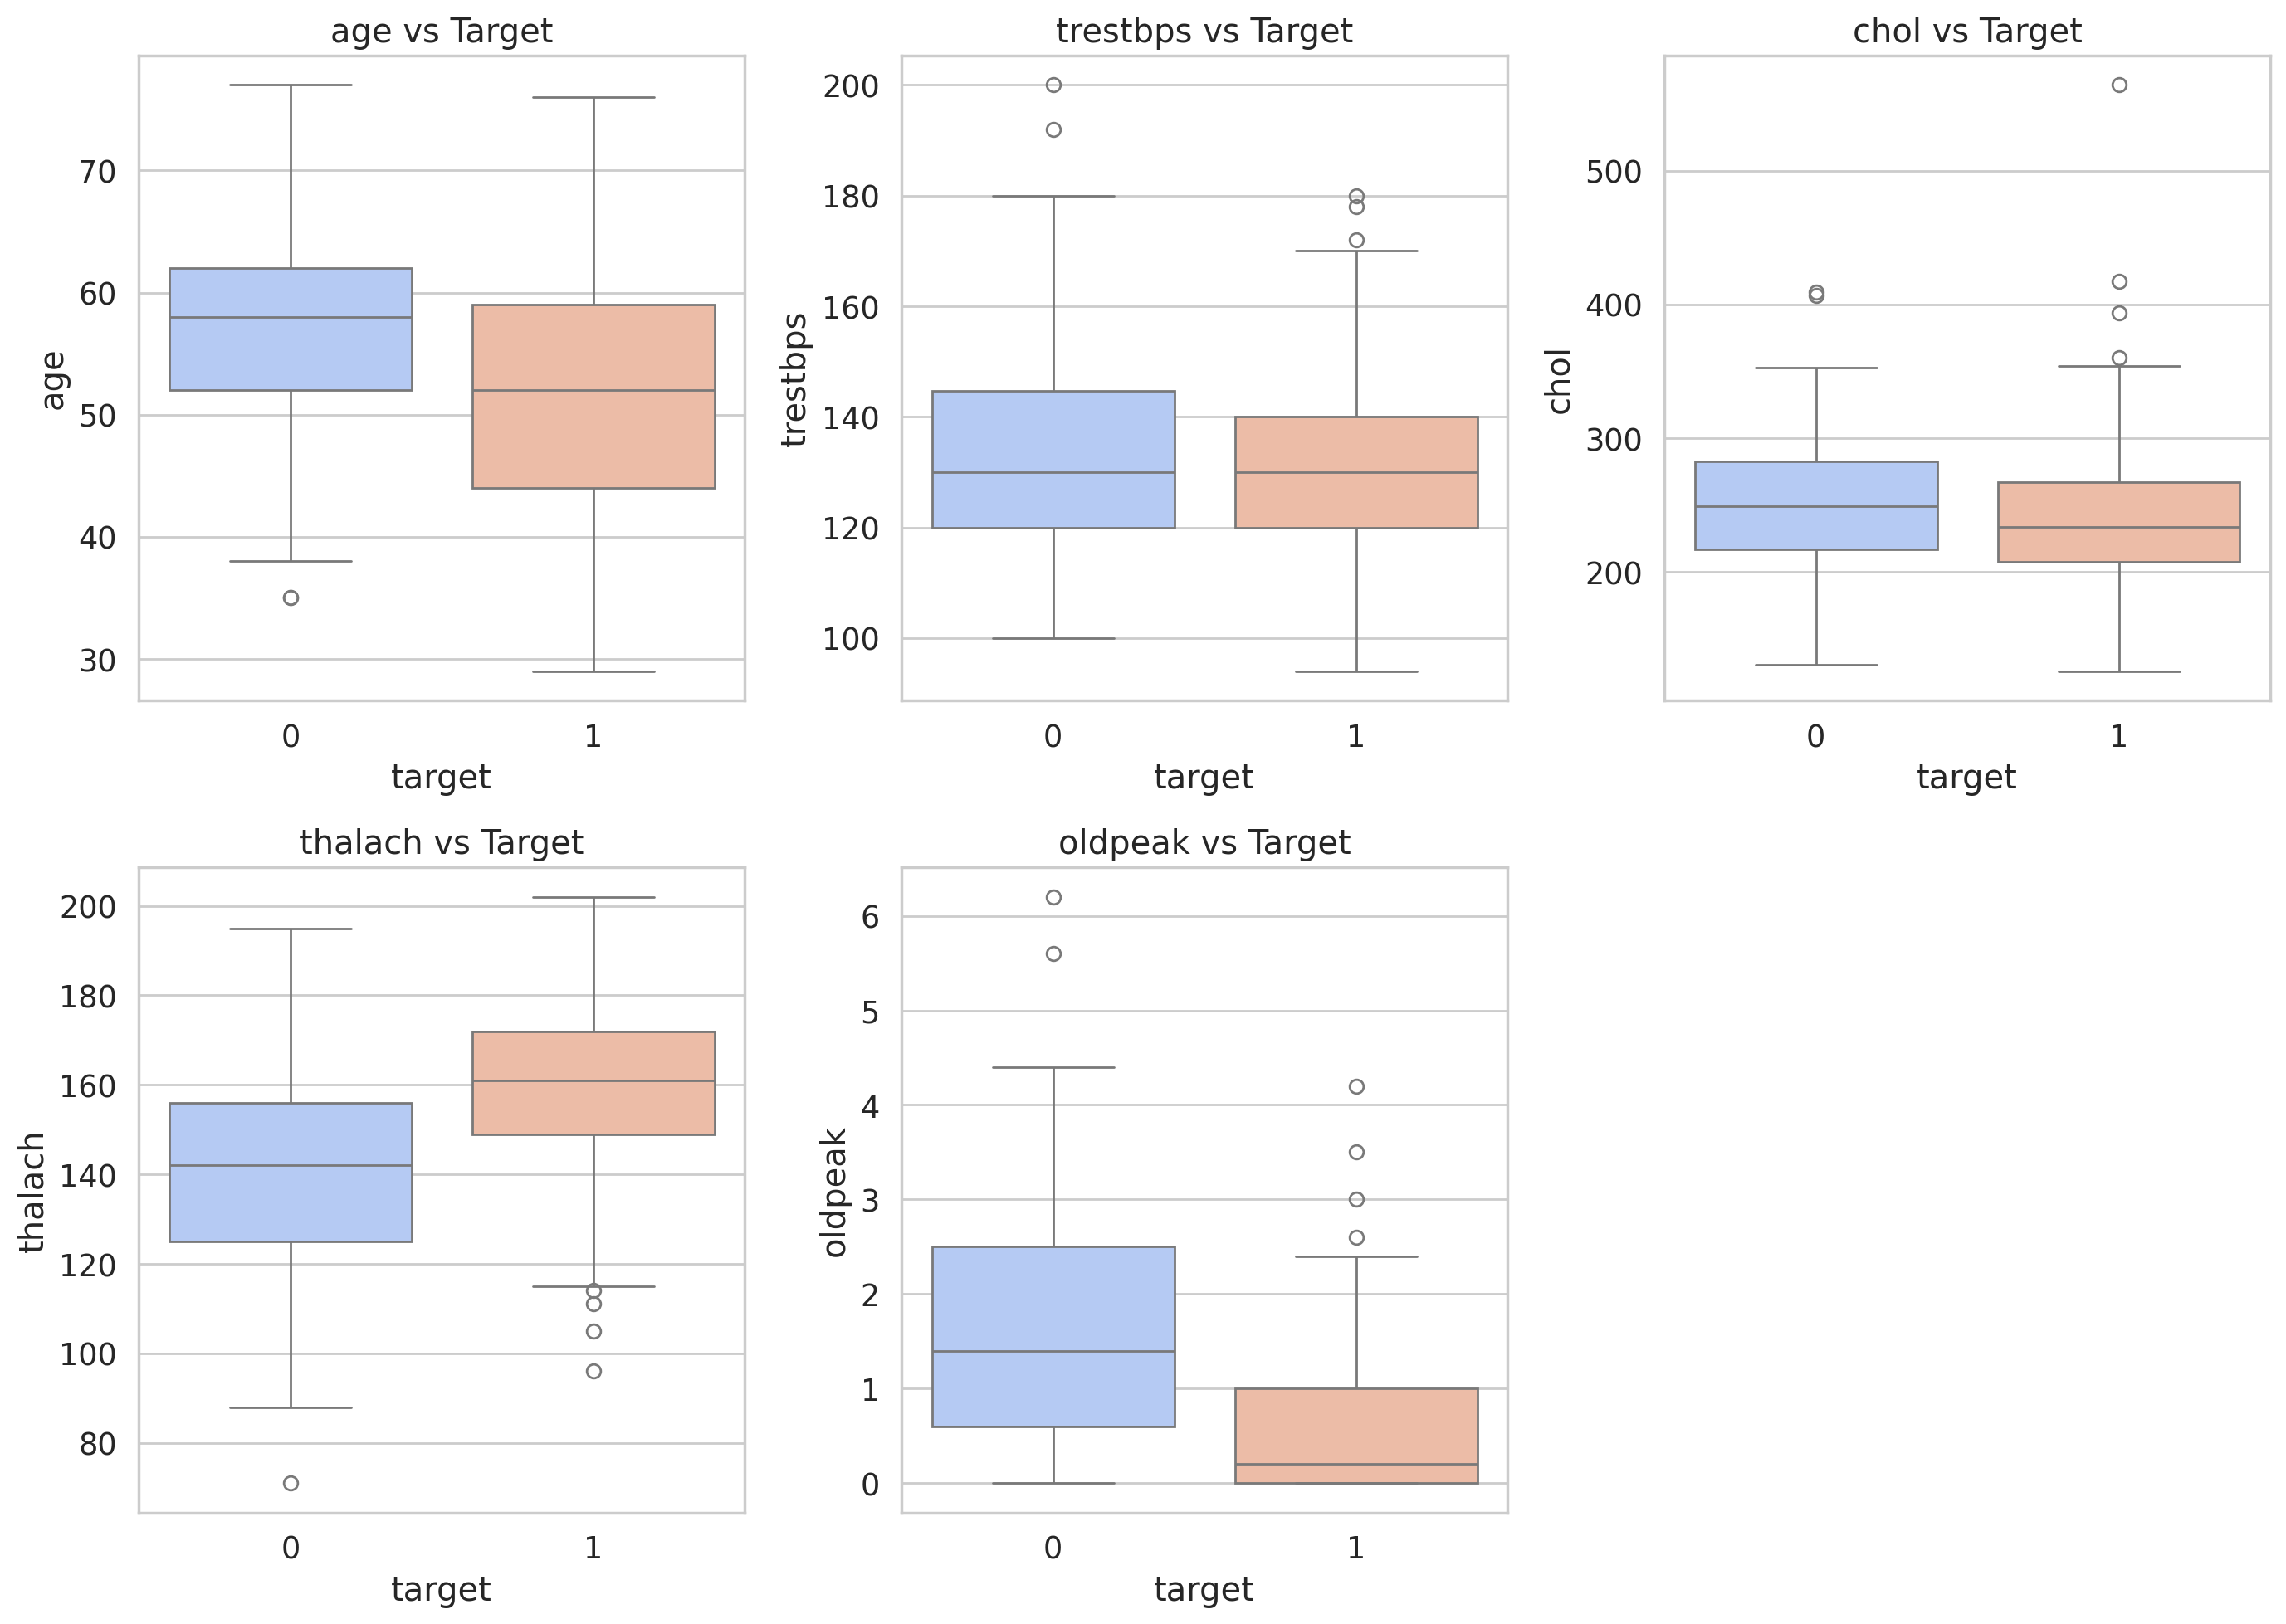

In [17]:
# Boxplot for numerical variables against target
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_data, x='target', y=column, palette='coolwarm')
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.show()

**Optional:** Plotly Express Version [Interactive and Value Check]

In [18]:
for column in numerical_columns:
    fig = px.box(heart_data, x='target', y=column, color='target',
                 title=f'{column} vs Target',
                 color_discrete_map={0: 'blue', 1: 'red'})  # Adjust colors as needed
    fig.show()

<font color='purple'><b>Countplot for Categorical Variables Against Target</b></font>

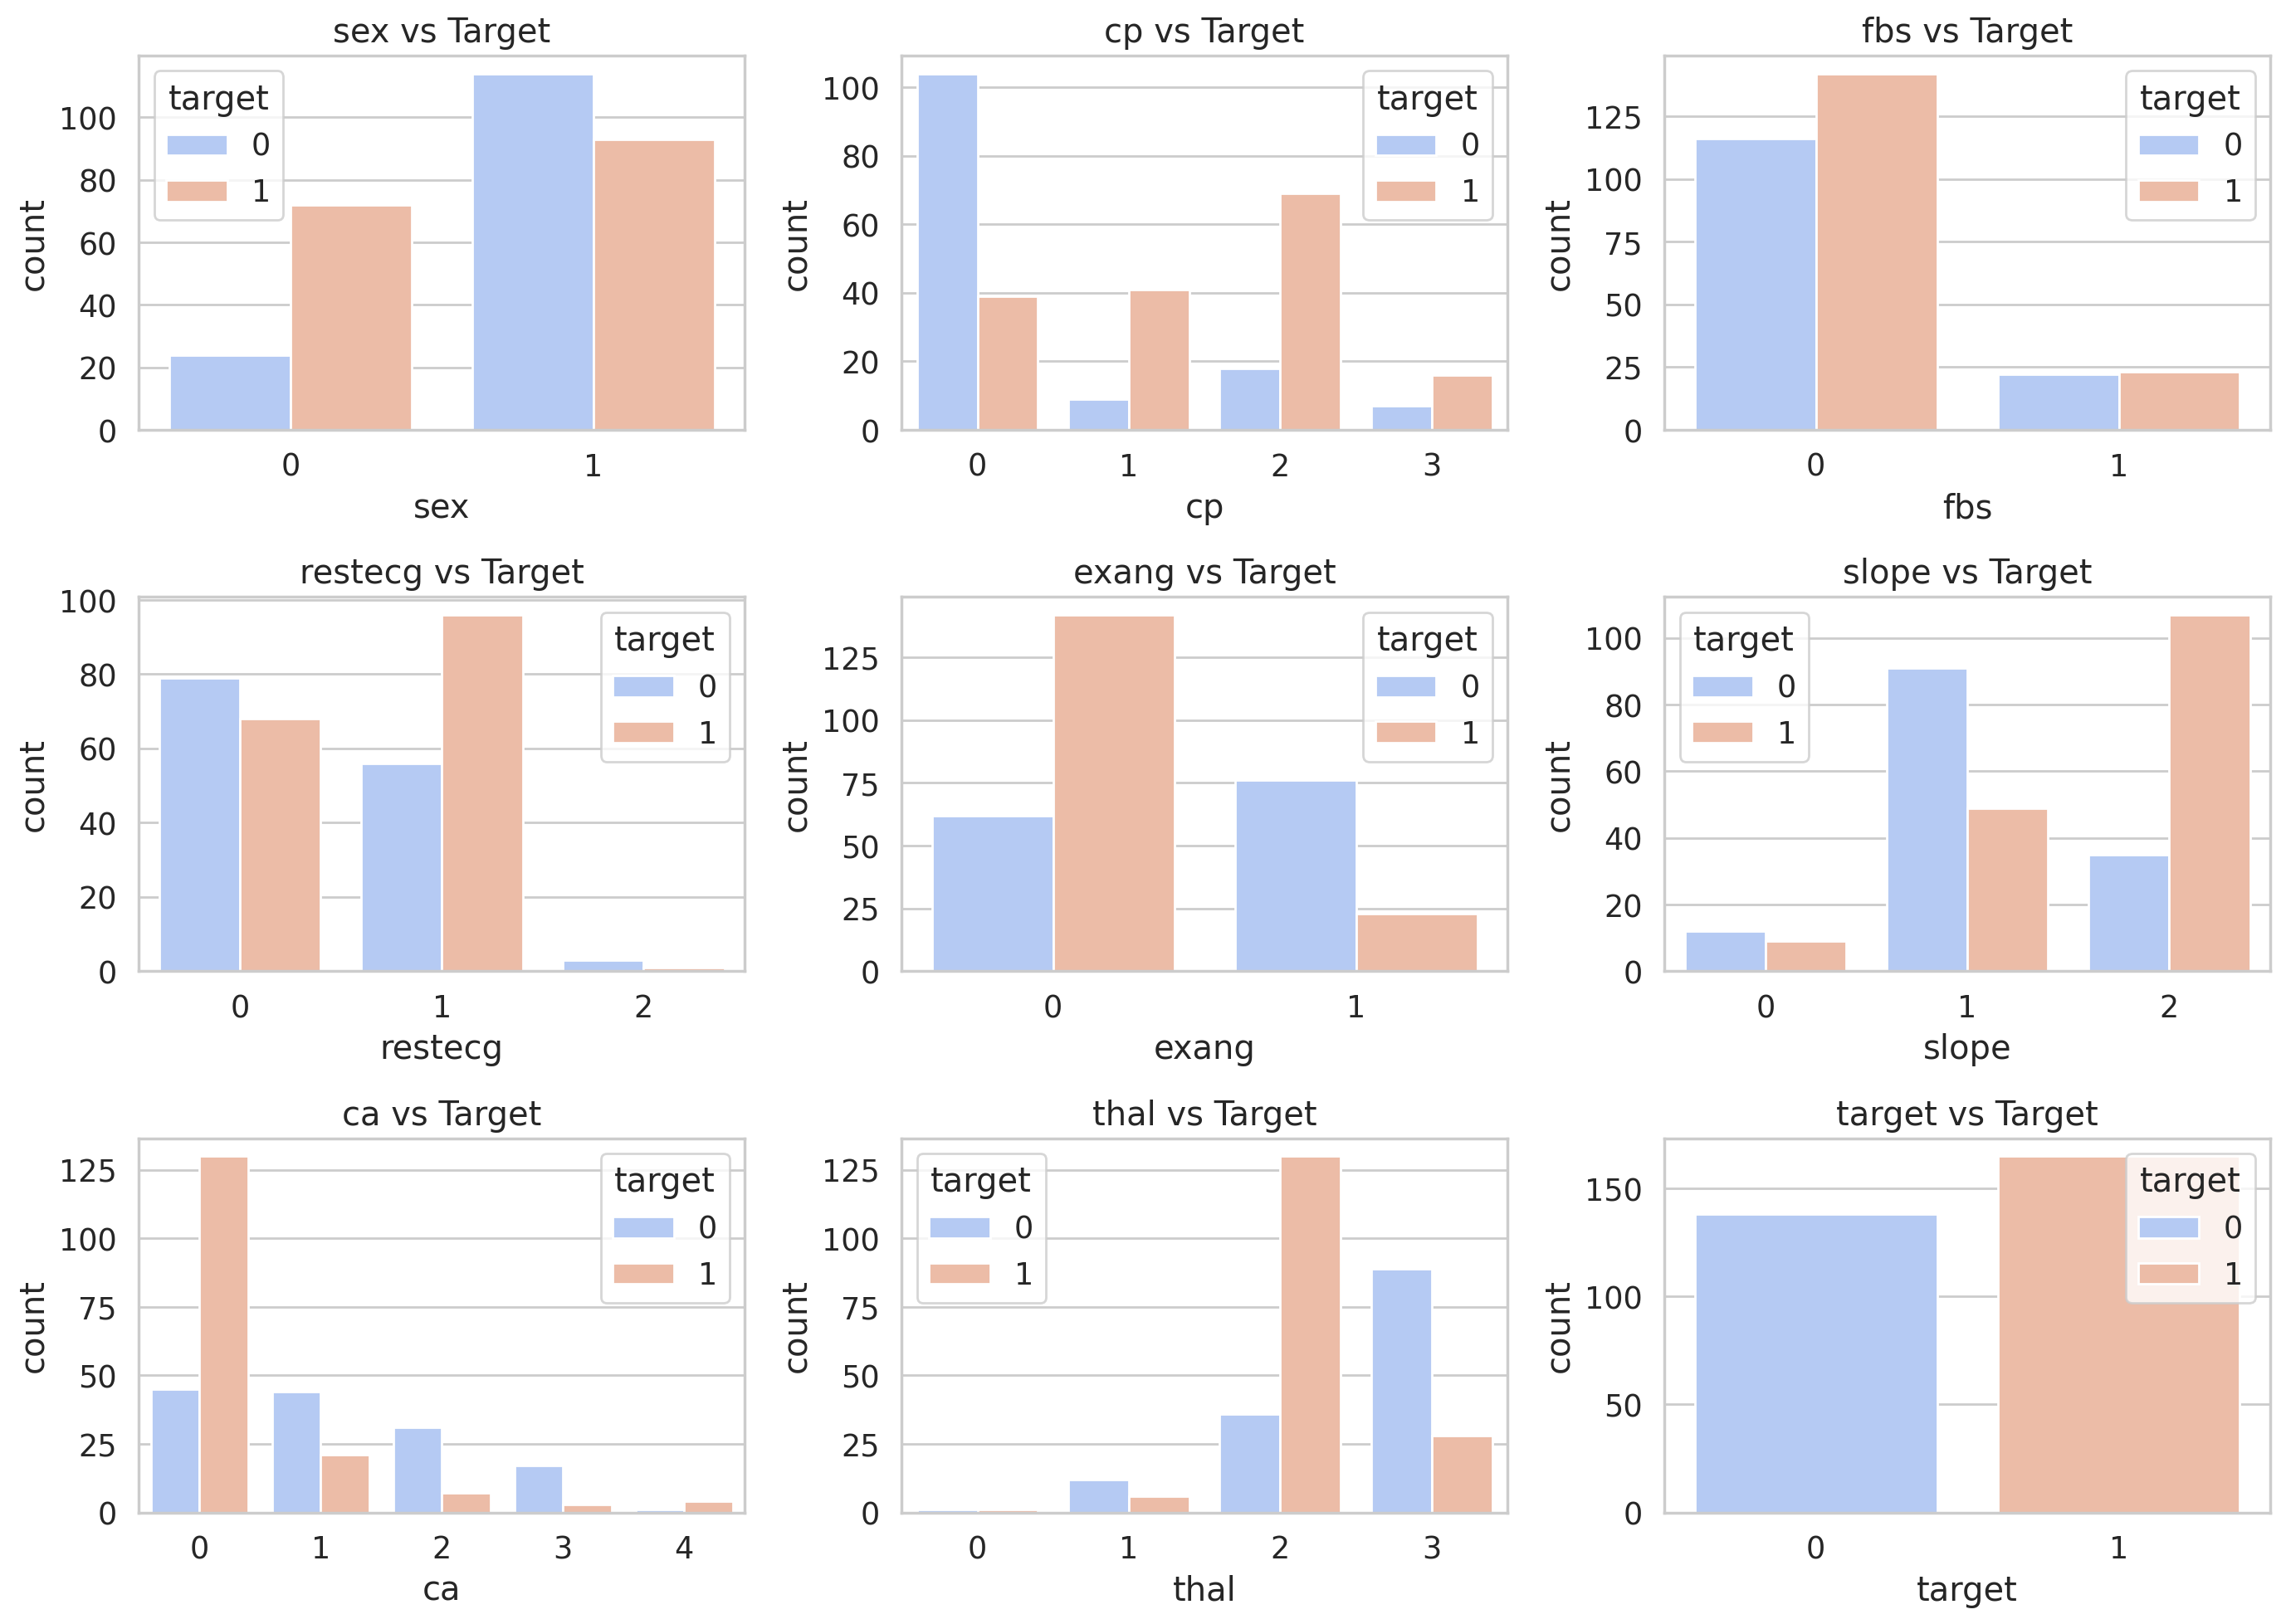

In [19]:
# Countplot for categorical variables against target
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='target', data=heart_data, palette='coolwarm')
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.show()

**Optional:** Plotly Express Version [Interactive and Value Check]

In [20]:
for column in categorical_columns:
    fig = px.histogram(heart_data, x=column, color='target',
                       title=f'{column} vs Target',
                       barmode='group',
                       color_discrete_map={0: 'blue', 1: 'red'},  # Assigning colors for targets
                       labels={'target': 'Heart Disease Presence'})  # Labeling the legend for clarity
    fig.update_layout(xaxis_title=column.capitalize(), yaxis_title='Count')
    fig.show()

<font color='purple'><b>Correlation Analysis</b></font>

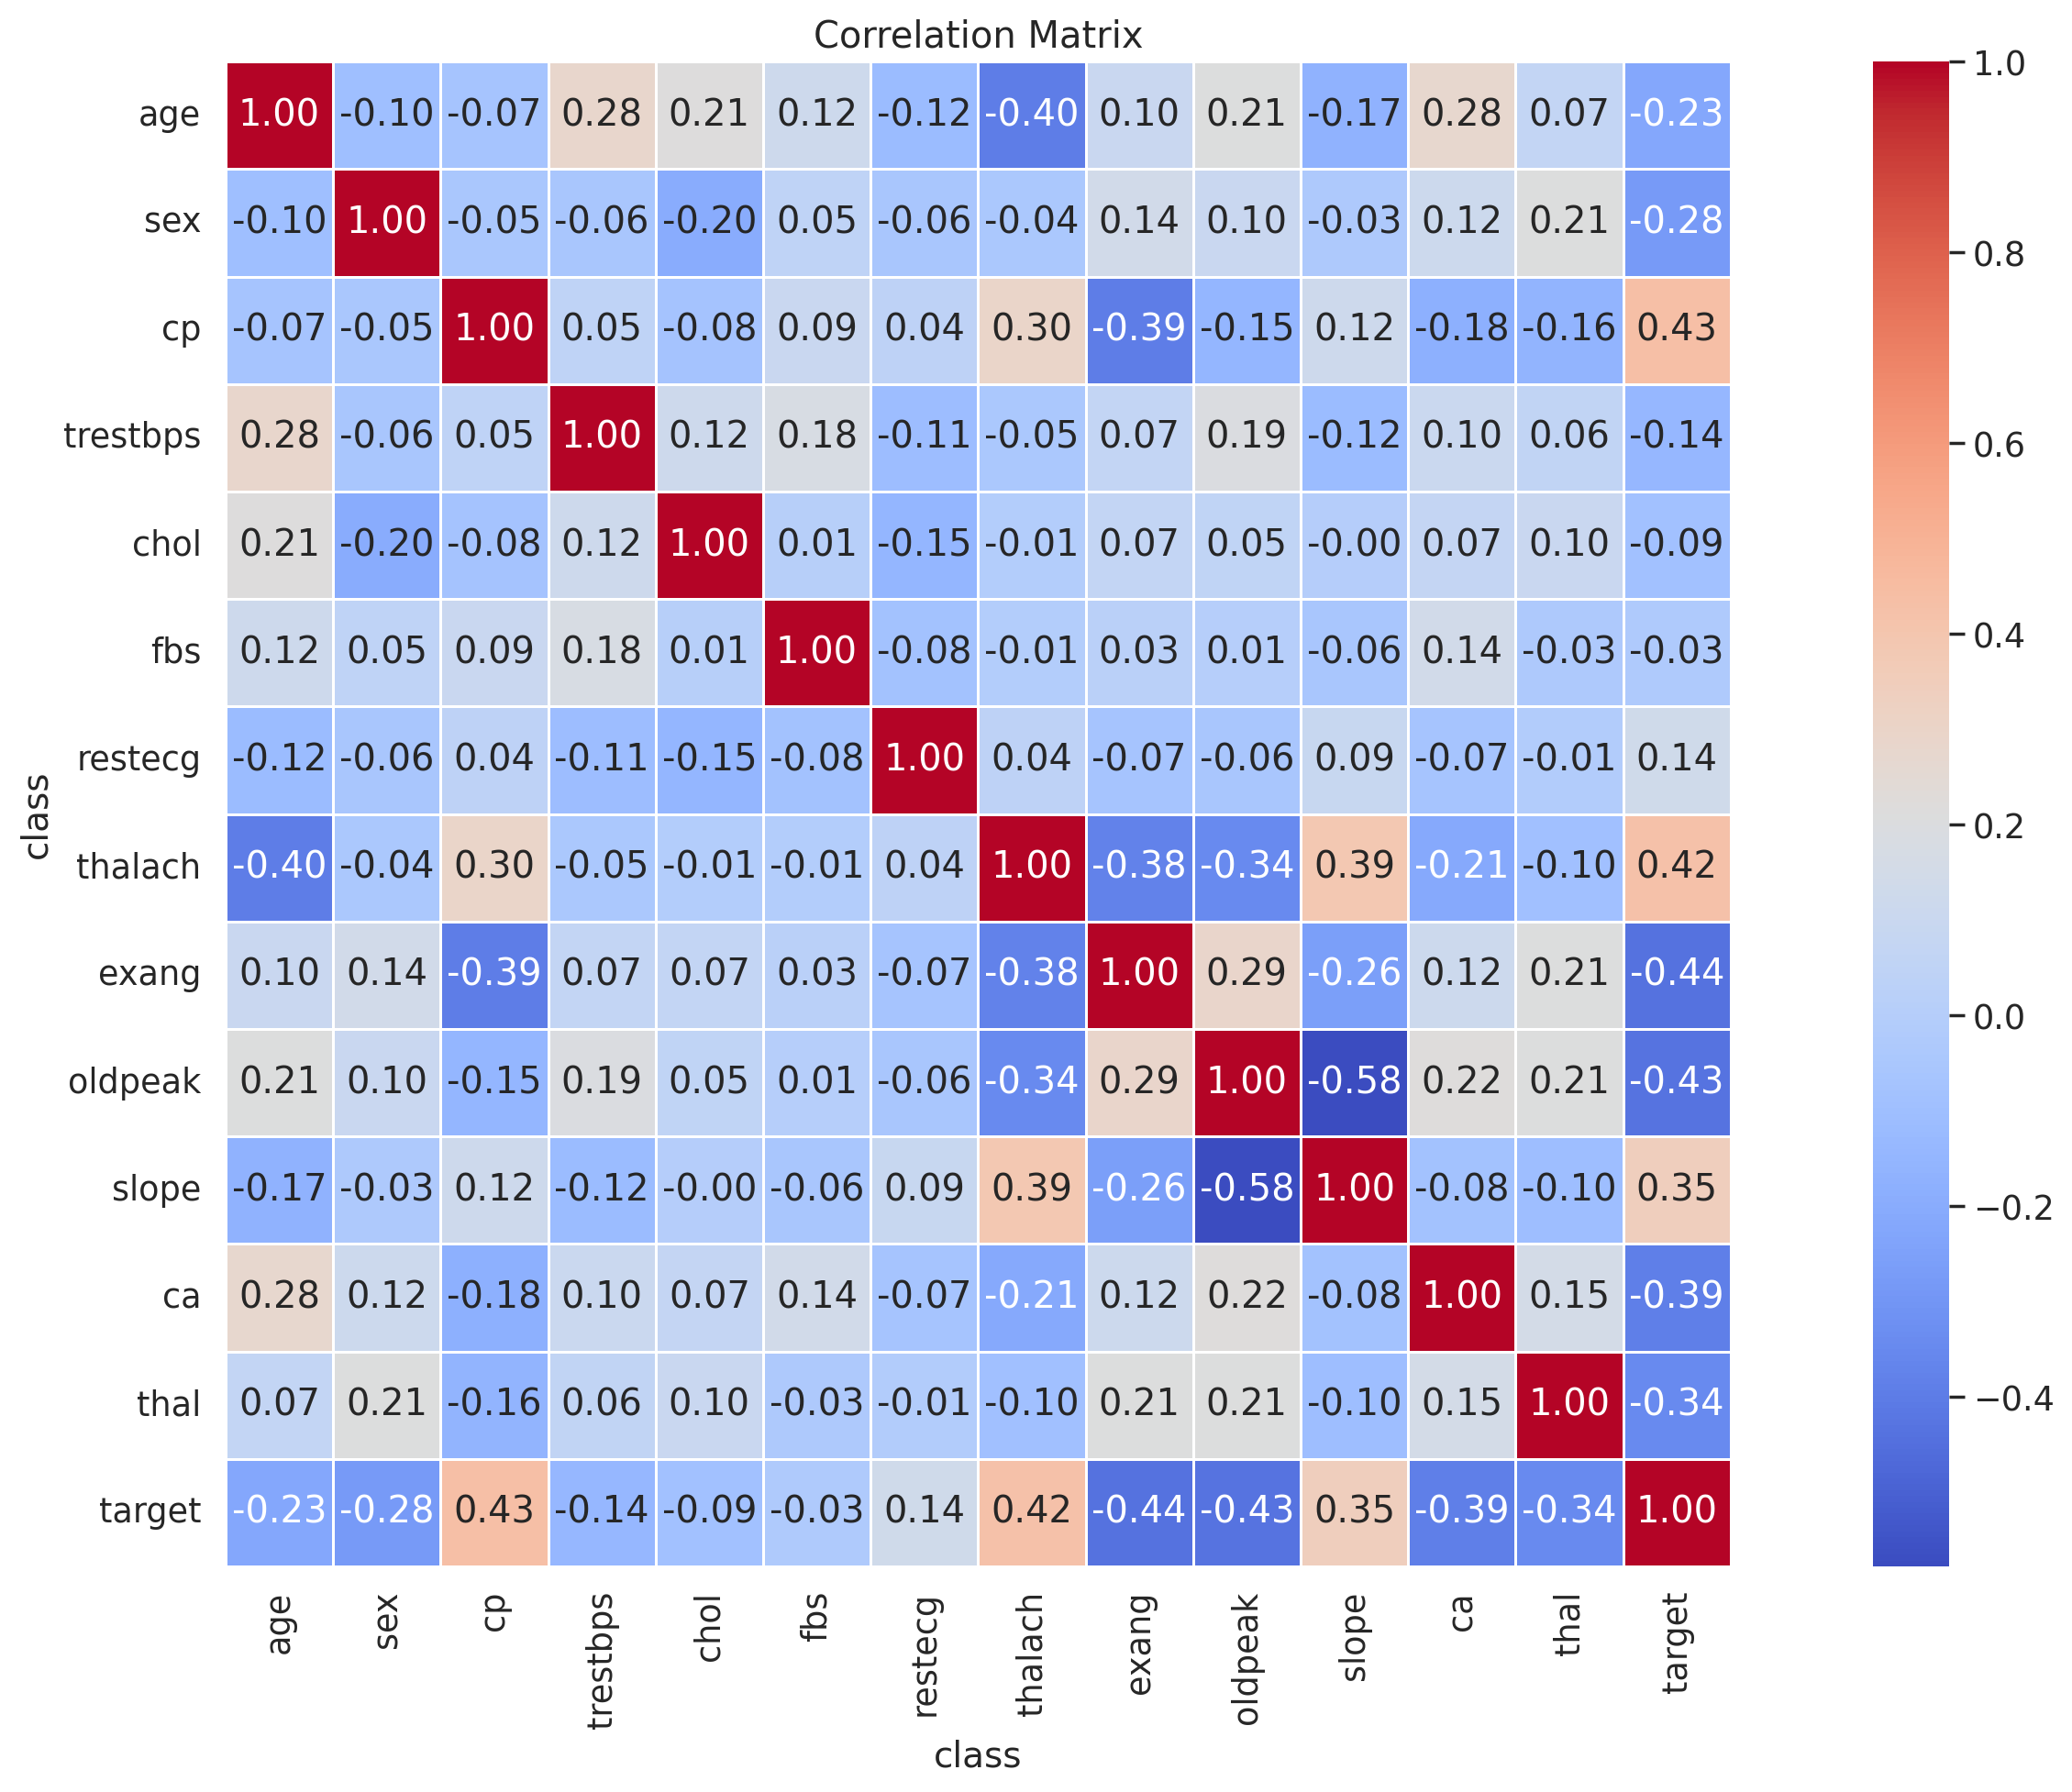

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.xlabel("class", size=14)
plt.ylabel("class", size=14)
plt.tight_layout()
plt.show()

<font color='blue'><b>Observation and Conclusion from the Overall EDA: </b></font>

1. There is no `missing value` in the overall heart dataset.
2. The presence of `outliers in some columns`, such as `'trestbps'` `'chol'`, `'thalach'`, and `'oldpeak'` may require further investigation and potential outlier handling based on the specific characteristics and goals of your analysis.
3. Analyzing the provided `correlation matrix` with respect to the 'target' variable, which indicates the presence (1) or absence (0) of heart disease, we can derive several insights about how different features correlate with the likelihood of heart disease. The strongest indicators for heart disease in this dataset appear to be related to the patient's response to exercise (`'cp'`, `'thalach'`, `'exang'`, `'oldpeak'`, `'slope'`) and visible conditions of the heart and blood vessels (`'ca'`, `'thal'`). The correlation values suggest that variables related to physiological stress responses and structural heart conditions are critical in predicting heart disease. This analysis could guide further detailed statistical testing and model building to predict heart disease using these features.

# 2.0 Question 2: Data Preprocessing

## 2.1 Handling Missing Values, Duplicates and Outliers

NO ACTIONS REQUIRED

**JUSTIFICATION:** The data quality assessment in **Section 1.0** revealed an exceptionally clean dataset with only one duplicate record. Given the negligible impact of this single duplicate, the dataset is considered suitable for analysis without modification.
Given the potential significance of outliers in representing rare cases or genuine data points, and considering the minimal impact on the analysis, the decision was made to retain them to preserve data integrity and avoid potential loss of valuable information.

## 2.2 Encoding Categorical Variables


In [22]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data_encoded = pd.get_dummies(heart_data, columns=categorical_columns, drop_first=True)
data_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


## 2.3 Integration and Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
data_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


## 2.4 Feature Importance and Dimensionality Reduction

In [24]:
# Separating the features and the target variable
X = data_encoded.drop('target', axis=1)  # Features
y = data_encoded['target']               # Target

# Convert the target variable to a discrete type
y = y.astype(int)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the data
rf_classifier.fit(X, y)

# Extracting feature importance
feature_importance = rf_classifier.feature_importances_

# Creating a DataFrame for visualization
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features = features.sort_values(by='Importance', ascending=False)

features

,Feature,Importance
3,thalach,0.123299
4,oldpeak,0.122426
20,thal_2,0.098208
0,age,0.086878
2,chol,0.079901
1,trestbps,0.075415
21,thal_3,0.071302
12,exang_1,0.049579
14,slope_2,0.041883
7,cp_2,0.038342


In [27]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Adjust the number of components as needed
X_pca = pca.fit_transform(data_encoded.drop(columns=['target']))
X_pca.shape

(303, 5)

In [28]:
# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27061496, 0.15268662, 0.118359  , 0.10518108, 0.06631854])

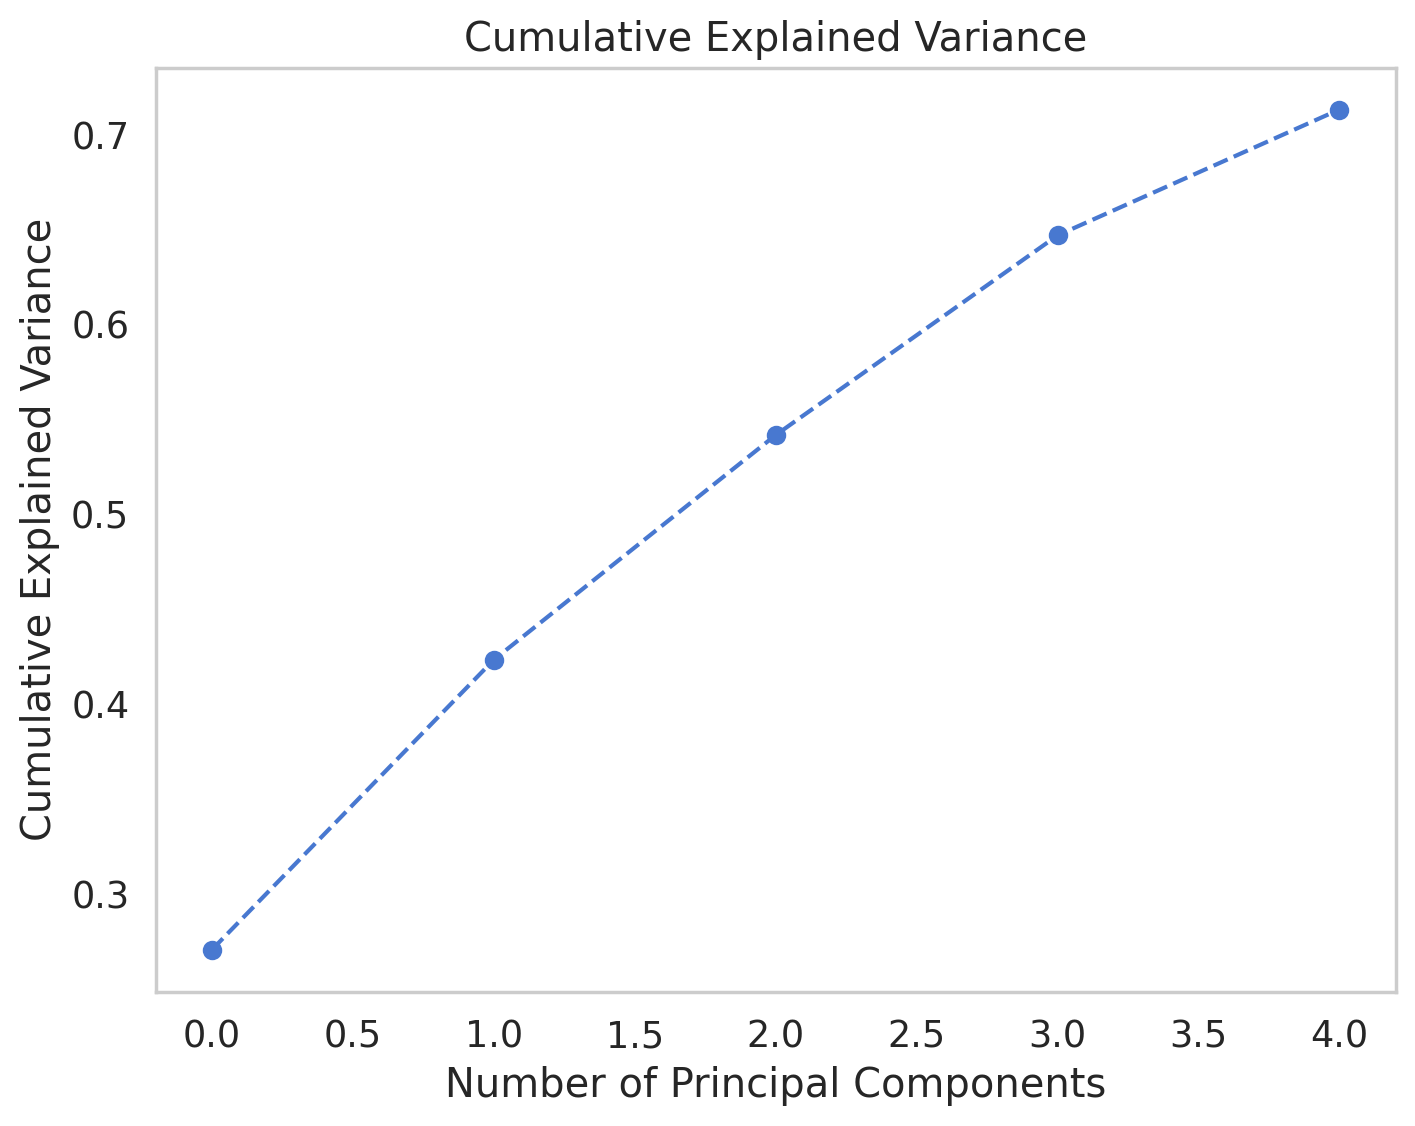

In [29]:
# Plot the cumulative explained variance to determine the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 3.0 Question 3: Machine Learning Implementation

### 3.1 Ensemble Learning Implementation

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

In [31]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Check the shape of training and testing sets
print(f"X_train dimensions: {X_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"y_test dimensions : {y_test.shape}")

X_train dimensions: (242, 22)
X_test dimensions: (61, 22)
y_train dimensions: (242,)
y_test dimensions : (61,)


#### 3.1.1 Using Grid Search Learning Model

In [33]:
def find_best_classifier(X_train, y_train, X_test, y_test):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2'],
                'C': [0.1, 1.0, 10.0],
                'solver': ['liblinear', 'lbfgs']
            }
        },
        'decision_tree_classifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10]
            }
        },
        'random_forest_classifier': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        },
        'gradient_boosting_classifier': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        },
        'adaboost_classifier': {
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2]
            }
        },
        'xgboost_classifier': {
            'model': xgb.XGBClassifier(),
            'params': {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1],
                'colsample_bytree': [0.3, 0.7, 1]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        # Grid search with cross-validation on the training data
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='accuracy')
        gs.fit(X_train, y_train)

        # Calculate training accuracy
        y_train_pred = gs.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Calculate test accuracy
        y_test_pred = gs.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store the results in a list
        scores.append({
            'model': algo_name,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'best_params': gs.best_params_
        })

    # Create a DataFrame from the results
    result_df = pd.DataFrame(scores, columns=['model', 'train_accuracy', 'test_accuracy', 'best_params'])

    return result_df

In [34]:
# Run the function to find the best classifier
result_df = find_best_classifier(X_train, y_train, X_test, y_test)
result_df

,model,train_accuracy,test_accuracy,best_params
0,logistic_regression,0.880165,0.868852,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin..."
1,decision_tree_classifier,0.847107,0.688525,"{'criterion': 'entropy', 'max_depth': 5, 'min_..."
2,random_forest_classifier,0.983471,0.868852,"{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
3,gradient_boosting_classifier,1.000000,0.754098,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
4,adaboost_classifier,0.884298,0.819672,"{'learning_rate': 0.1, 'n_estimators': 200}"
5,xgboost_classifier,1.000000,0.852459,"{'colsample_bytree': 0.7, 'learning_rate': 0.2..."


Based on the Grid Search results, it is evident that the `logistic regression`, `random_forest_classifier`, and `xgboost_classifier` exhibit substantial levels of both training and testing accuracy.

In [35]:
# Store the hyperparameter in to csv to compute the best model
result_df.to_csv('ml_hyperparameters.csv', index=False)

In [36]:
# Extract and convert the best hyperparameters
logistic_regression_params = result_df[result_df['model'] == 'logistic_regression']['best_params'].values[0]
decision_tree_params = result_df[result_df['model'] == 'decision_tree_classifier']['best_params'].values[0]
random_forest_params = result_df[result_df['model'] == 'random_forest_classifier']['best_params'].values[0]
gradient_boosting_params = result_df[result_df['model'] == 'gradient_boosting_classifier']['best_params'].values[0]
adaboost_params = result_df[result_df['model'] == 'adaboost_classifier']['best_params'].values[0]
xgboost_params = result_df[result_df['model'] == 'xgboost_classifier']['best_params'].values[0]

In [37]:
# Logistic Regression with best hyperparameters
logistic_regression_model = LogisticRegression(**logistic_regression_params)
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)

# Decision Tree Classifier with best hyperparameters
decision_tree_model = DecisionTreeClassifier(**decision_tree_params)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Random Forest Classifier with best hyperparameters
random_forest_model = RandomForestClassifier(**random_forest_params)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Gradient Boosting Classifier with best hyperparameters
gradient_boosting_model = GradientBoostingClassifier(**gradient_boosting_params)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Ada Boost Classifier with best hyperparameters
adaboost_model = AdaBoostClassifier(**adaboost_params)
adaboost_model.fit(X_train, y_train)
y_pred_ab = adaboost_model.predict(X_test)

# XGBoost Classifier with best hyperparameters
xgboost_model = xgb.XGBClassifier(**xgboost_params)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

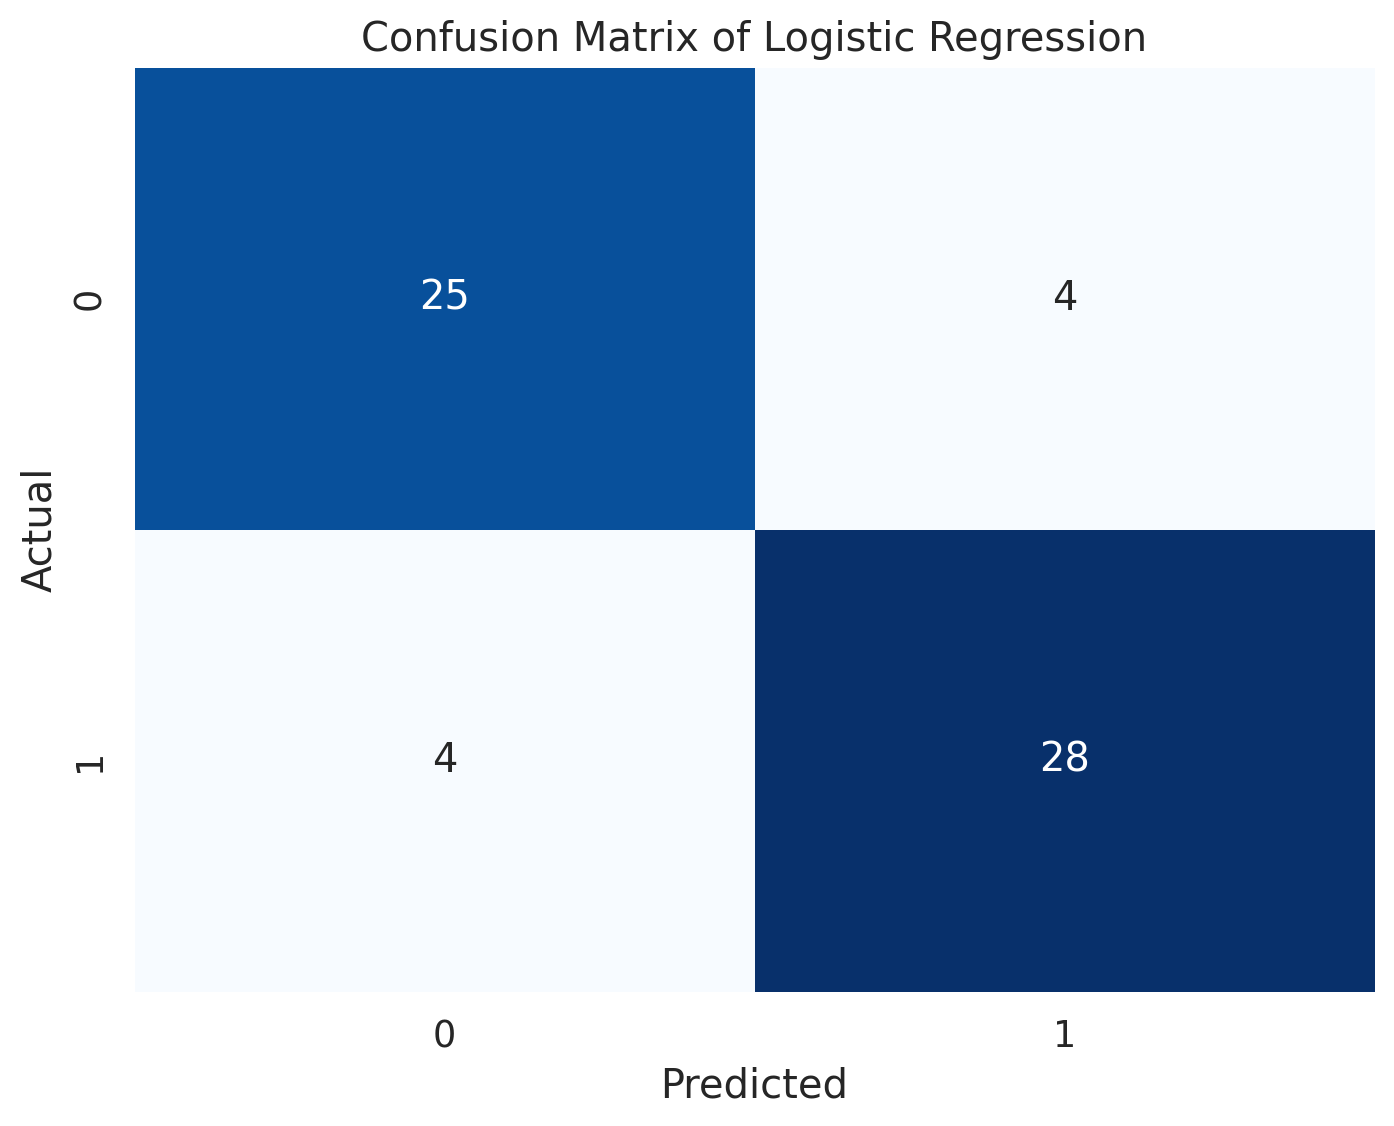


Classification Report for: Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [38]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Logistic Regression")
print(class_report)

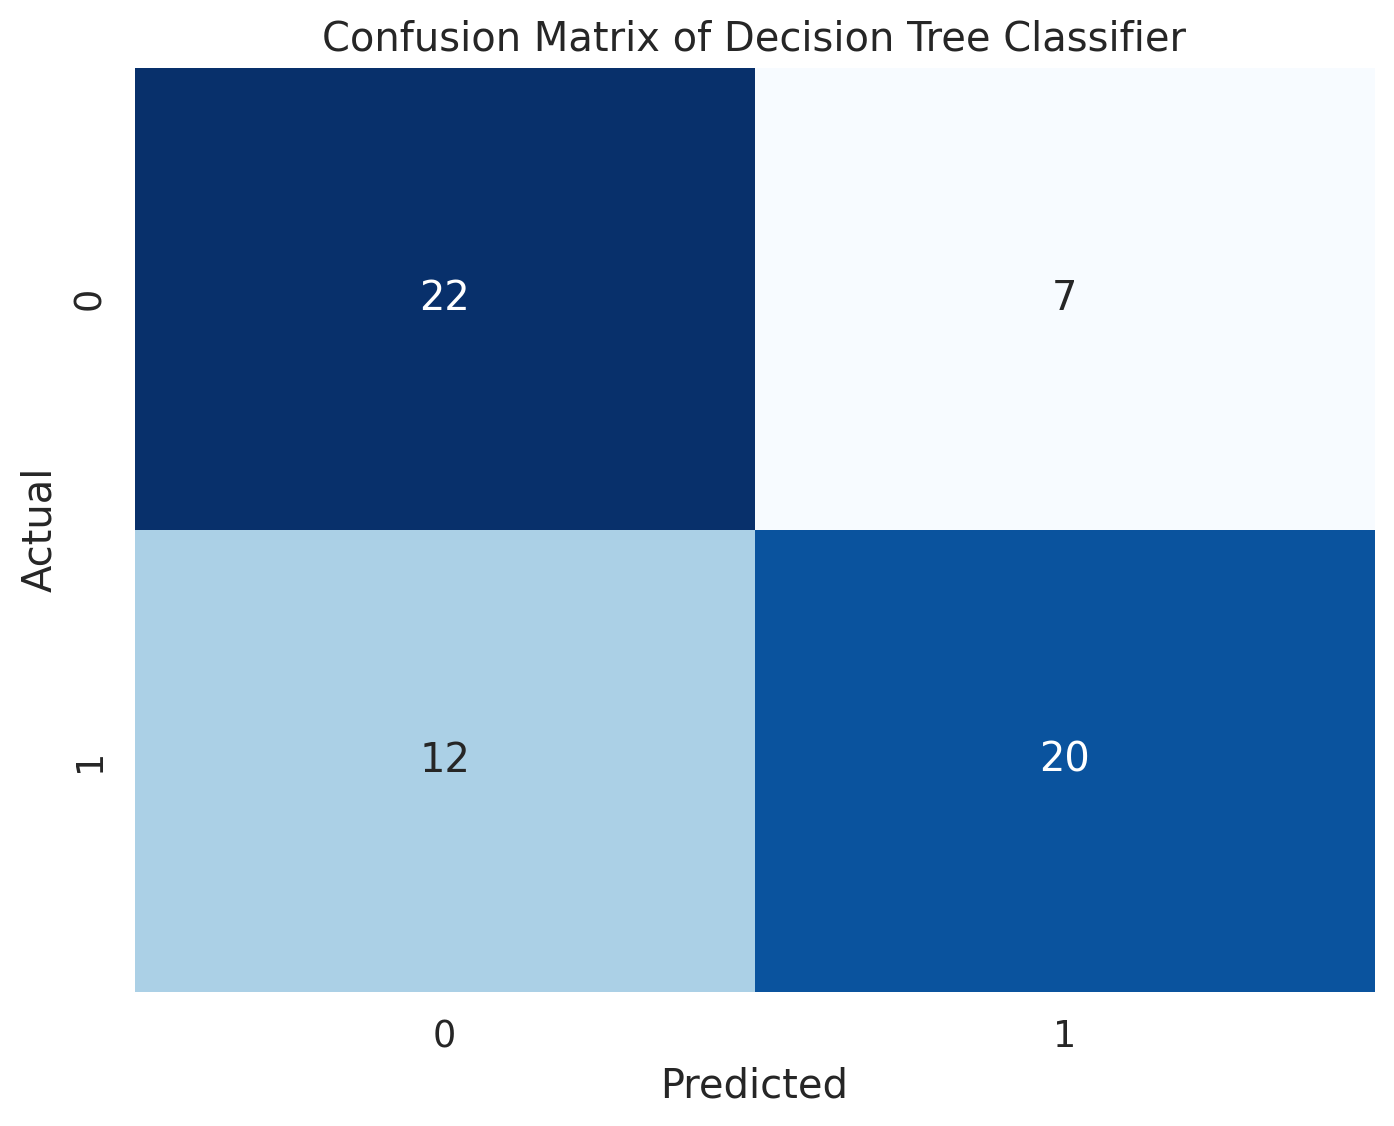


Classification Report for: Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.74      0.62      0.68        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61



In [39]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Decision Tree Classifier")
print(class_report)

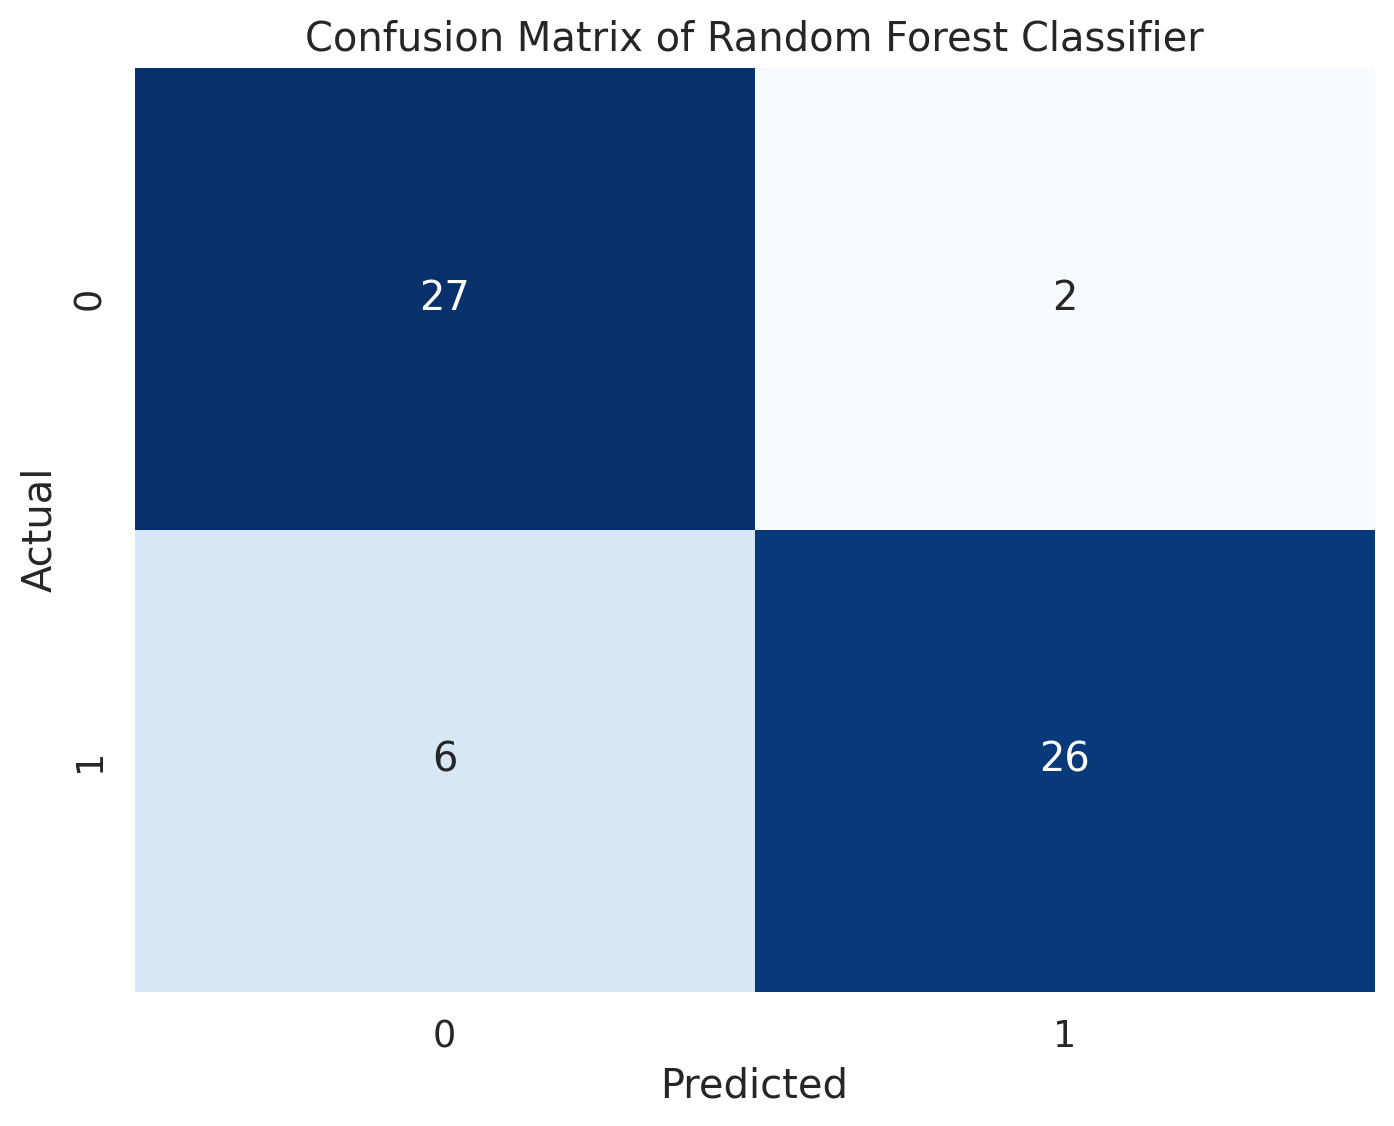


Classification Report for: Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [40]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Random Forest Classifier")
print(class_report)

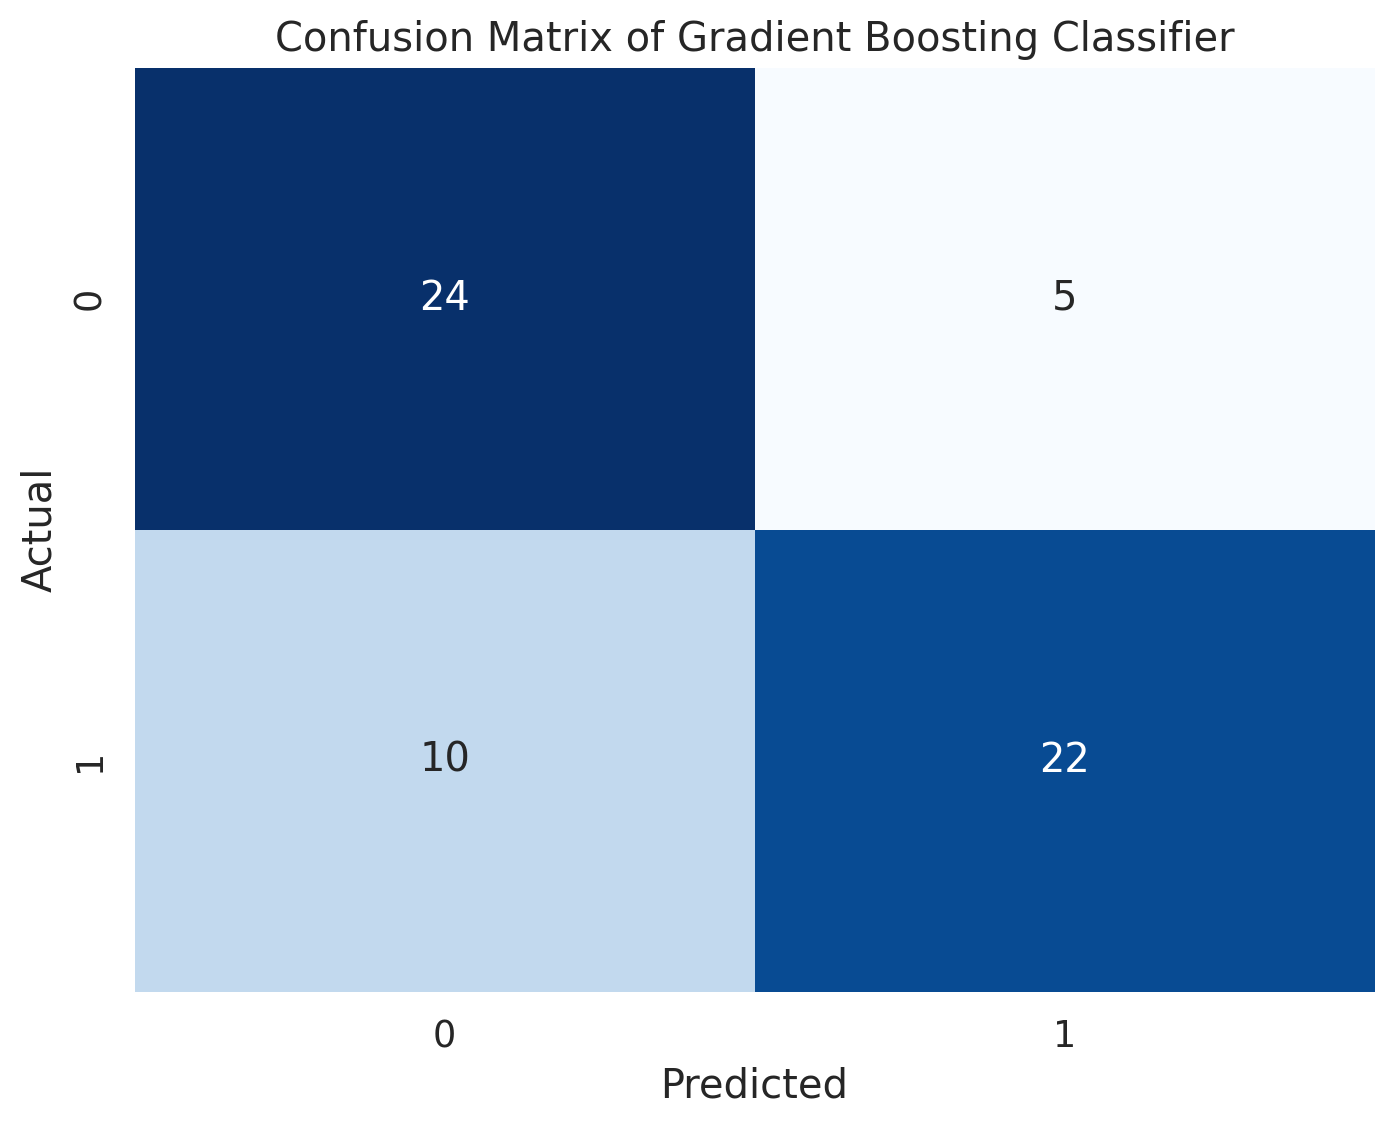


Classification Report for: Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.81      0.69      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [41]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_gb)
class_report = classification_report(y_test, y_pred_gb)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Gradient Boosting Classifier")
print(class_report)

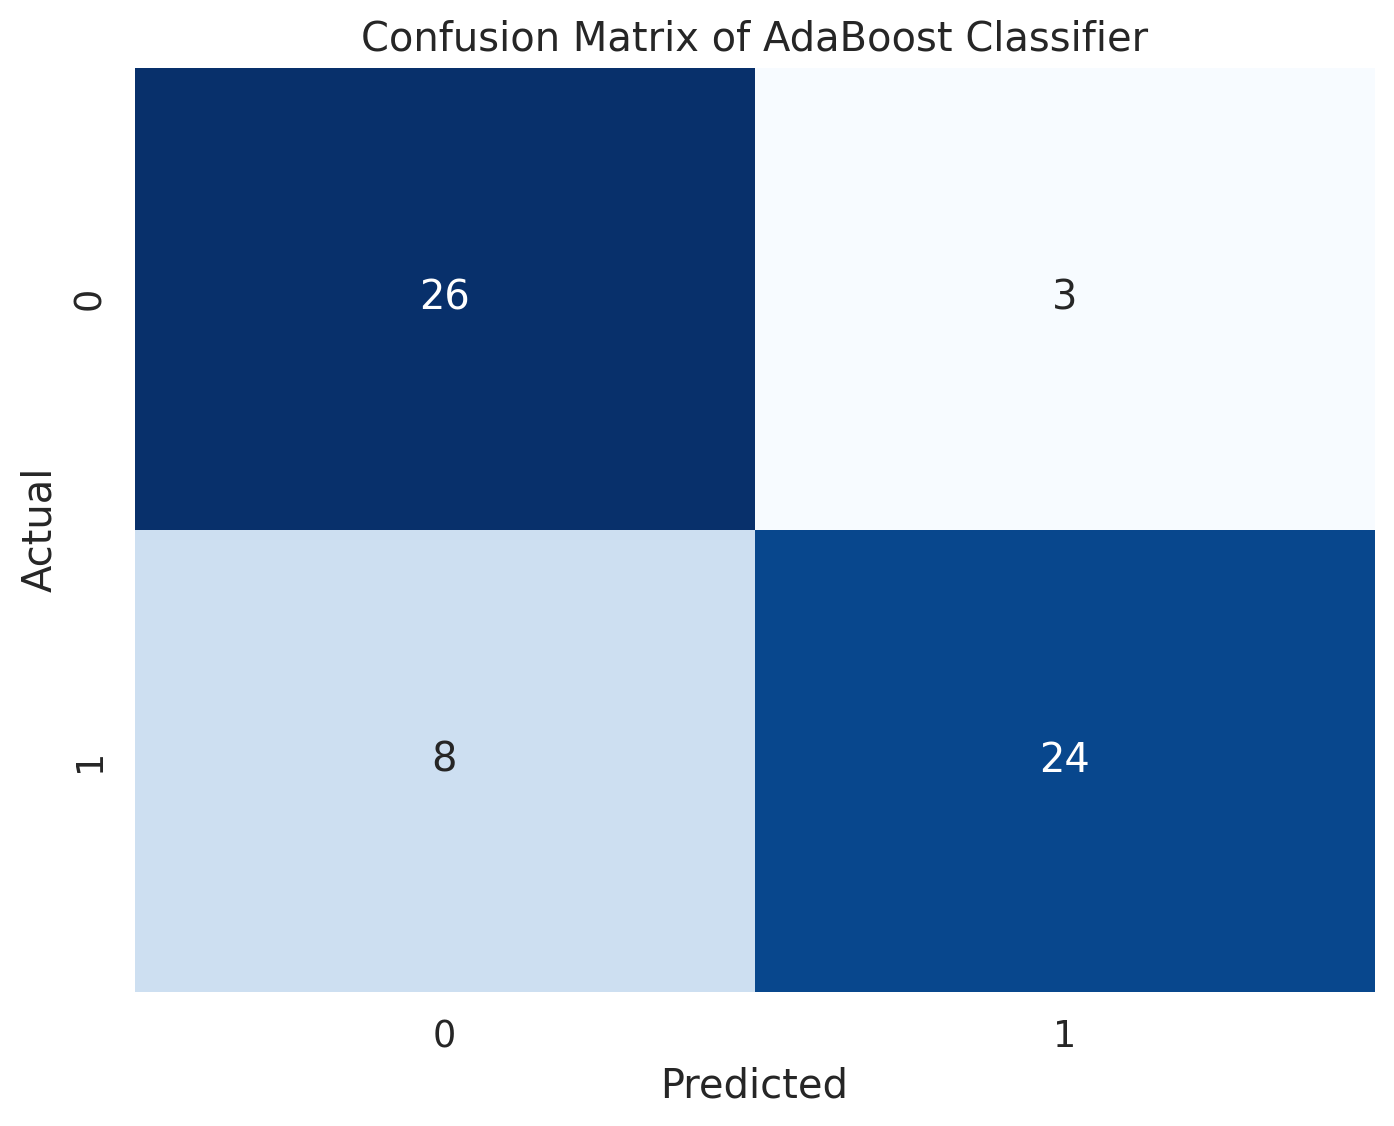


Classification Report for: AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [42]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_ab)
class_report = classification_report(y_test, y_pred_ab)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of AdaBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: AdaBoost Classifier")
print(class_report)

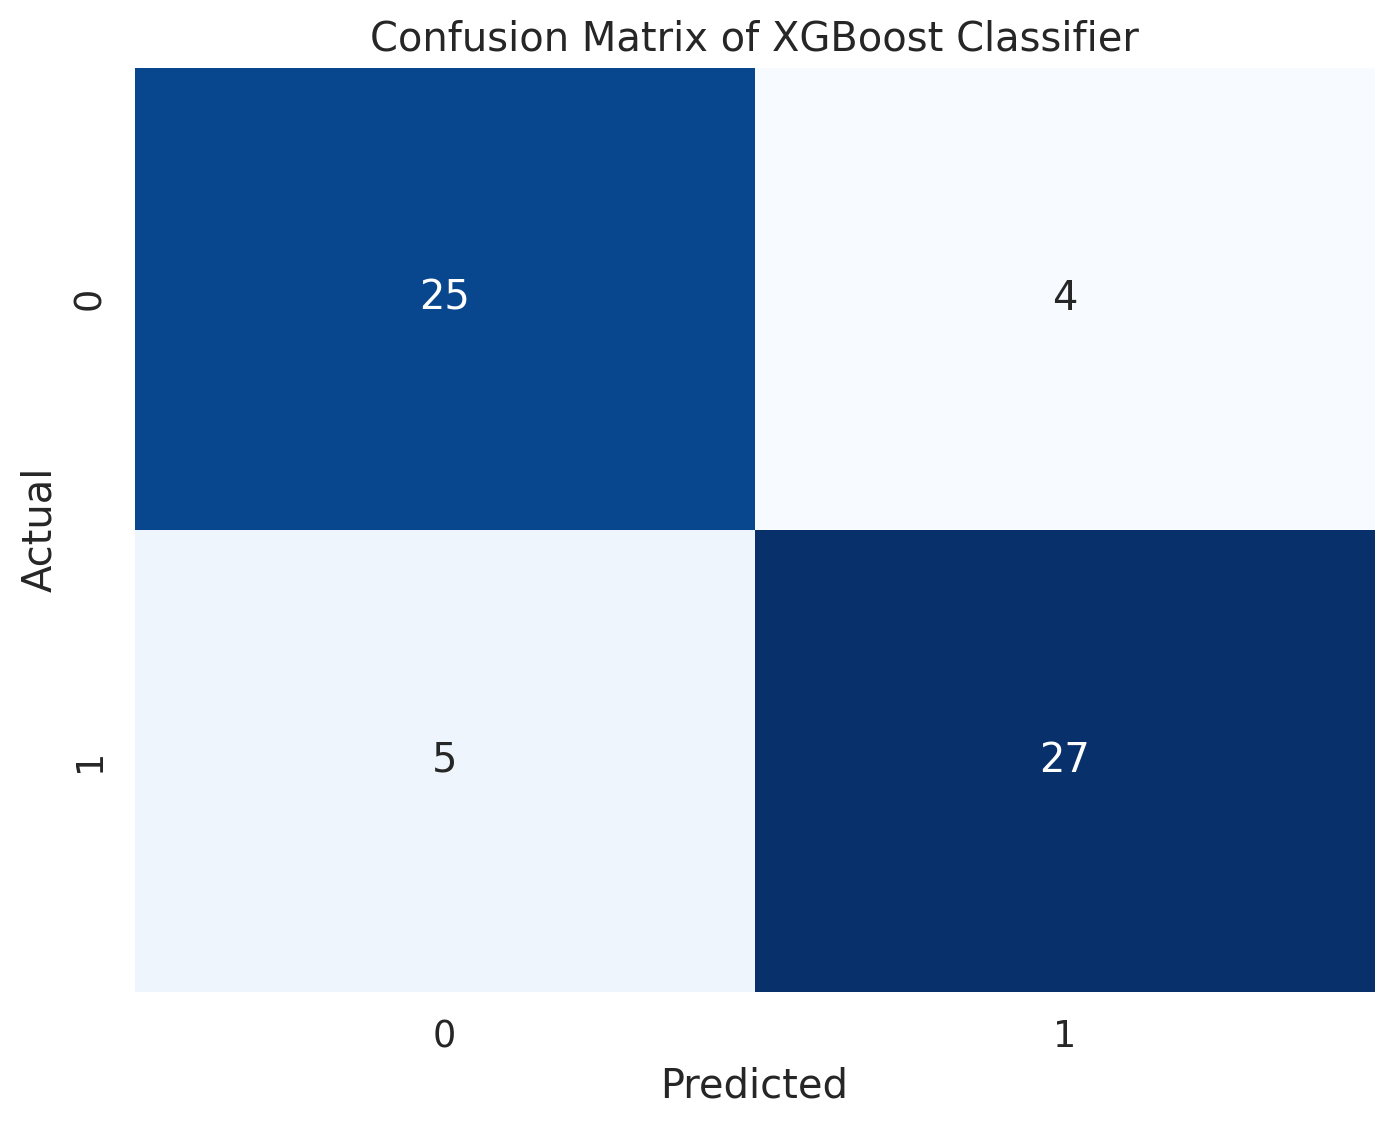


Classification Report for: XGBoost Classifier
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [43]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: XGBoost Classifier")
print(class_report)

#### 3.1.2 Using Voting Classifier Method

In [44]:
from sklearn.ensemble import VotingClassifier

<font color='orange'><b>Voting Classifier (lr + rf + xgboost)</b></font>

In [45]:
# Initialize the individual classifiers
lr = LogisticRegression(**logistic_regression_params)
rf = RandomForestClassifier(**random_forest_params)
xgboost = xgb.XGBClassifier(**xgboost_params)

# Create the voting classifier
voting_classifier_01 = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('xgboost', xgboost)], voting='hard')

In [46]:
# Fit the voting classifier on the training data
voting_classifier_01.fit(X_train, y_train)

# Predict using the voting classifier
y_pred_voting_01 = voting_classifier_01.predict(X_test)

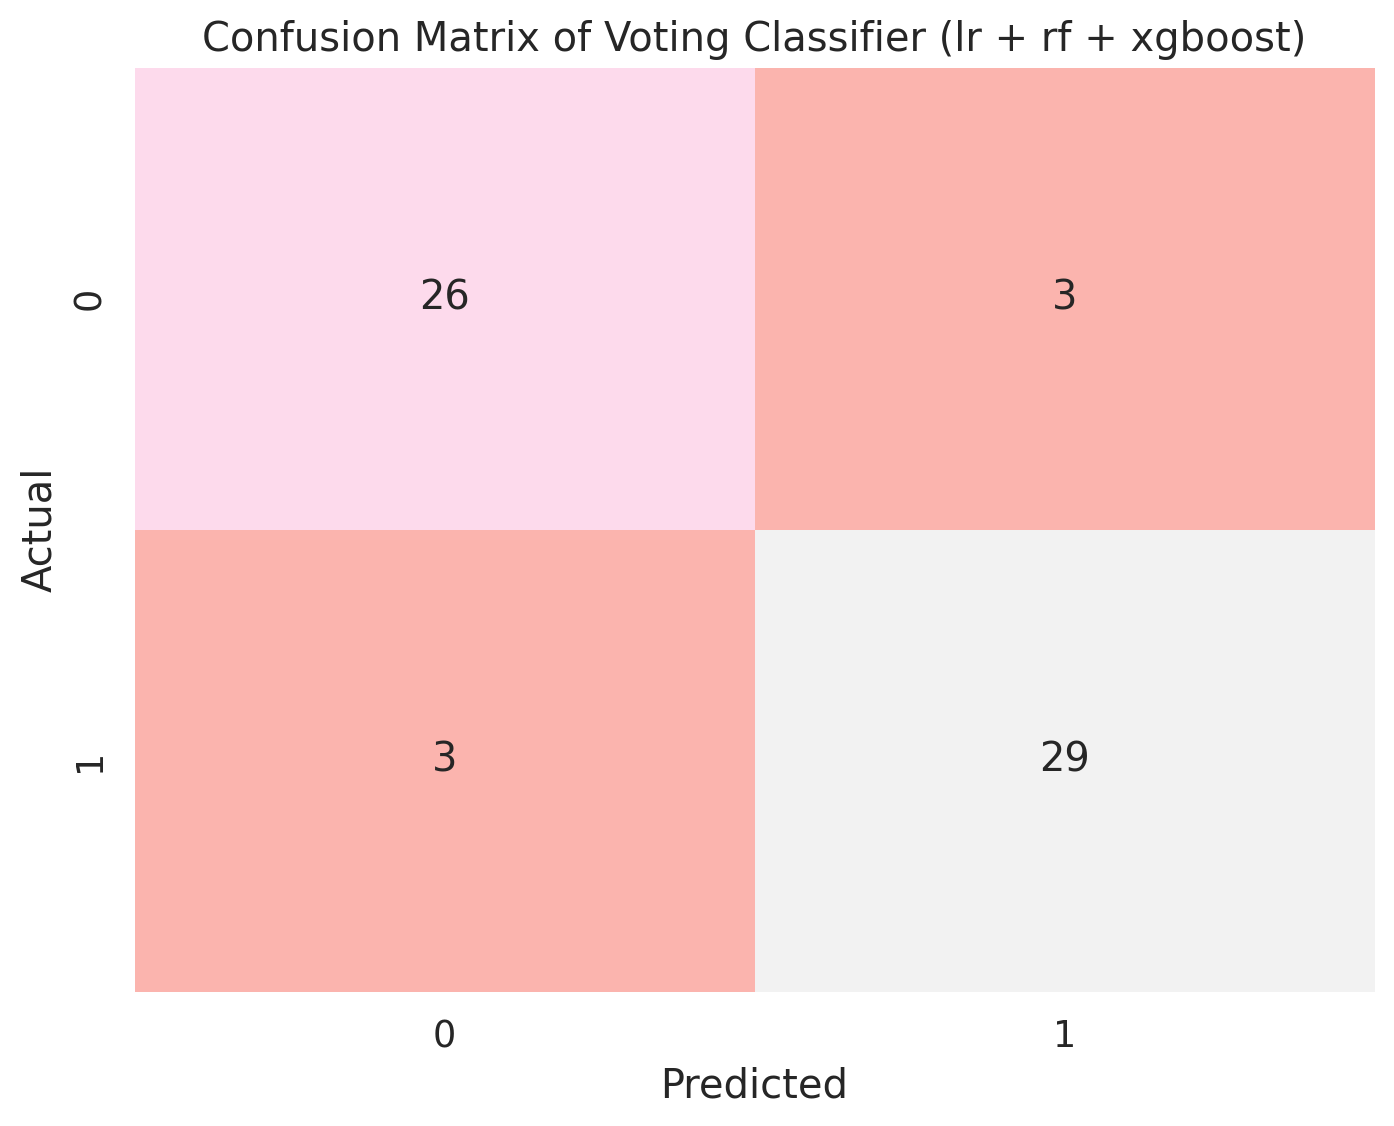


Classification Report for: Voting Classifier (lr + rf + xgboost)
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [47]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_voting_01)
class_report = classification_report(y_test, y_pred_voting_01)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Pastel1", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Voting Classifier (lr + rf + xgboost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Voting Classifier (lr + rf + xgboost)")
print(class_report)

<font color='orange'>Voting Classifer (rf + gb + ab)

In [48]:
# Initialize the individual classifiers
rf = RandomForestClassifier(**random_forest_params)
gb = GradientBoostingClassifier(**gradient_boosting_params)
ab = AdaBoostClassifier(**adaboost_params)

# Create the voting classifier
voting_classifier_02 = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('ab', ab)], voting='hard')

In [49]:
# Fit the voting classifier on the training data
voting_classifier_02.fit(X_train, y_train)

# Predict using the voting classifier
y_pred_voting_02 = voting_classifier_02.predict(X_test)

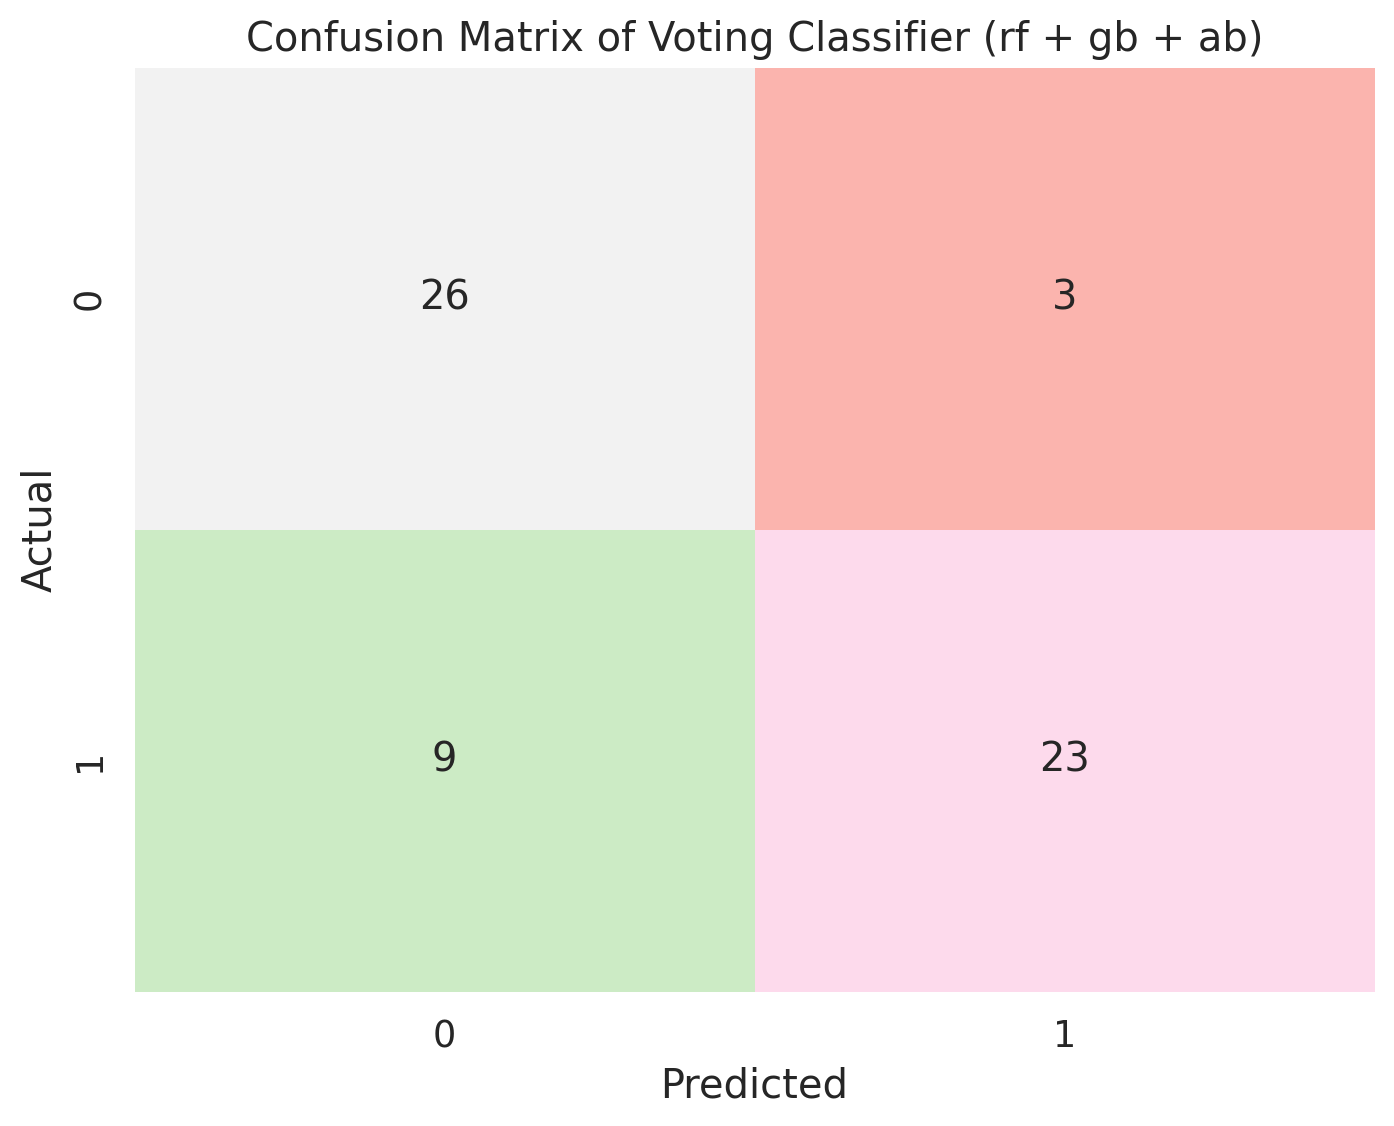


Classification Report for: Voting Classifier (rf + gb + ab)
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [50]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_voting_02)
class_report = classification_report(y_test, y_pred_voting_02)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Pastel1", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Voting Classifier (rf + gb + ab)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Voting Classifier (rf + gb + ab)")
print(class_report)

### 3.2 Deep Learning Implementation

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
# Initialize the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [59]:
# Implement early stopping and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    verbose=1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step - accuracy: 0.5778 - loss: 0.9891 - val_accuracy: 0.3878 - val_loss: 0.7038
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4812 - loss: 1.2236 - val_accuracy: 0.6531 - val_loss: 0.6713
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5316 - loss: 0.9080 - val_accuracy: 0.6327 - val_loss: 0.6477
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6529 - loss: 0.7132 - val_accuracy: 0.7143 - val_loss: 0.6311
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6381 - loss: 0.6955 - val_accuracy: 0.7551 - val_loss: 0.6178
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.6793 - val_accuracy: 0.7551 - val_loss: 0.6078
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6626 - loss: 0.7552 - val_accuracy: 0.7551 - val_loss: 0.5991
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7167 - loss: 0.6361 - val_accuracy: 0.7551 - val_loss: 0.

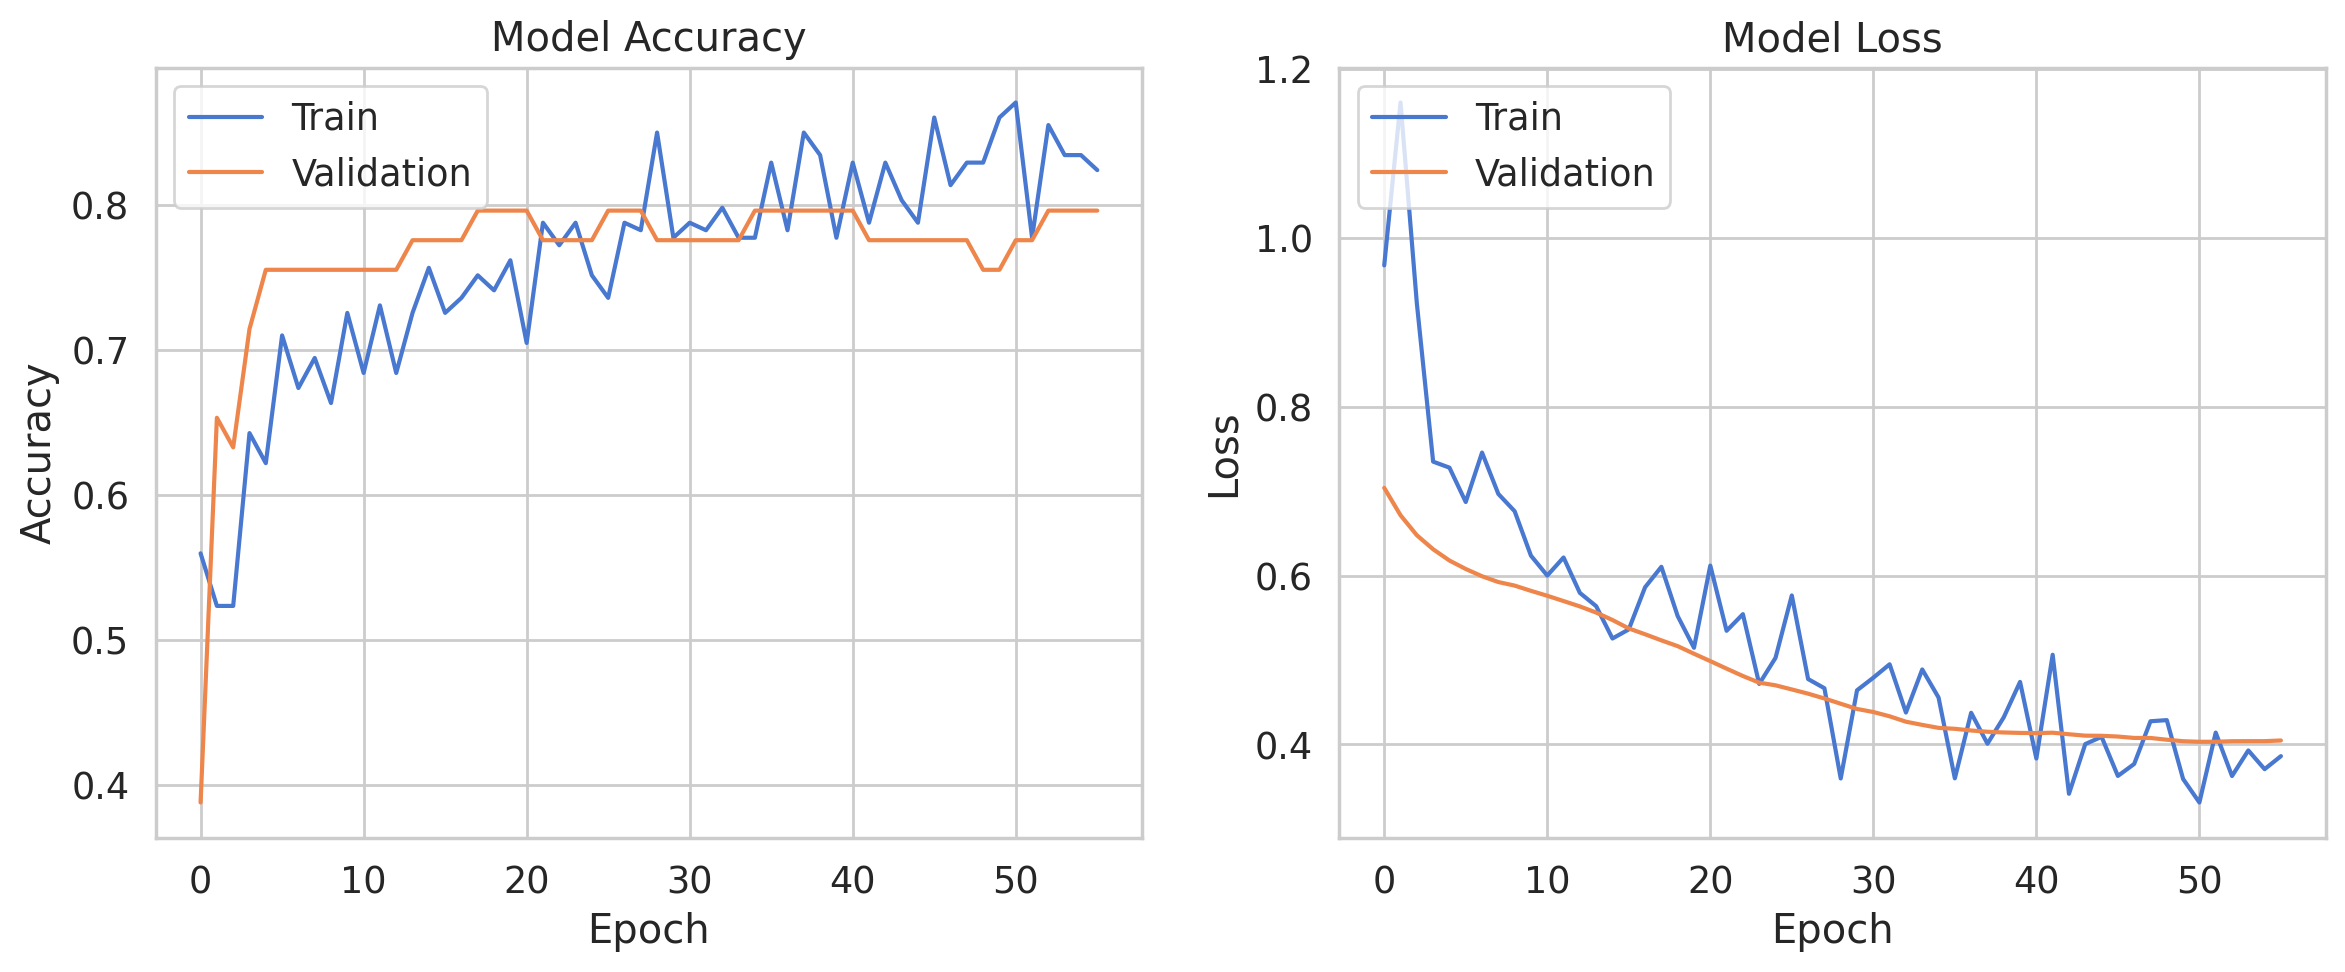

In [60]:
# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [61]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred_nn = (y_pred_prob > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step


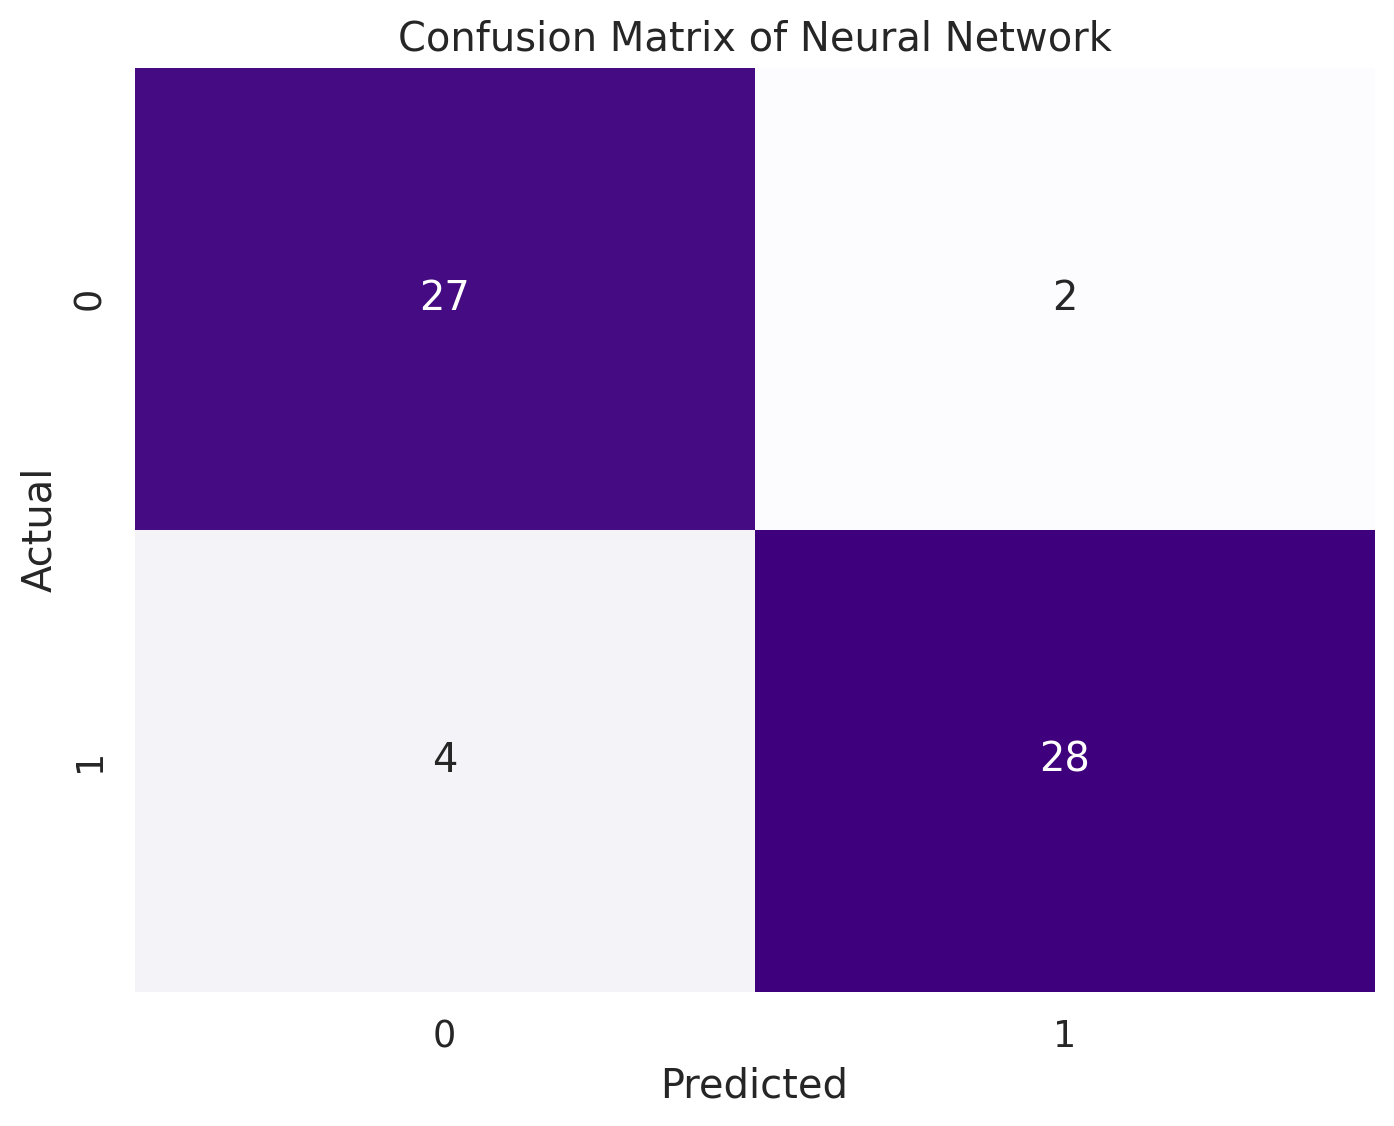


Classification Report for: Neural Network
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [62]:
# Stimulate the confusion matrix and classification report for further analysis
confusion_mat = confusion_matrix(y_test, y_pred_nn)
class_report = classification_report(y_test, y_pred_nn)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
plt.title("Confusion Matrix of Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(f"\nClassification Report for: Neural Network")
print(class_report)